Gewichten voor gebruiker 8899244: {'average_altitude_change': 0.003256593291601, 'average_distance': 0.06695833376940001, 'average_condition_value': 0.929785072938998, 'distance_to_user': 1.0, 'preference_score': 1.0}


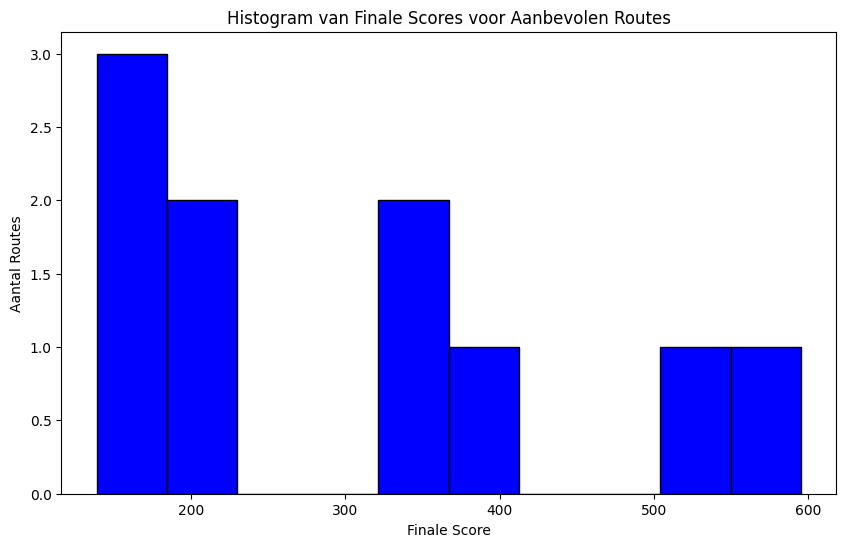

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,orig_altitude_change,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,road_preference_score,surface_preference_score,preference_score,cosine_similarity_score,final_score
83,"[55.66768831573427, 55.667743971571326, 55.667...","[12.591057568788528, 12.590581644326448, 12.59...","[-19.0, -18.6, -16.2, -14.6, -14.0, -13.0, -12...",run,469691679,"[123, 132, 139, 146, 151, 154, 155, 156, 158, ...","[1423432145, 1423432152, 1423432159, 142343216...","[6.8508, 15.5844, 15.5196, 14.6808, 14.6124000...",0.568061,0.939655,...,50.8,14.415433,-1.6844,0.211100,67.101126,444.106464,747.477778,595.792121,-0.610874,595.181247
13,"[55.712638115510345, 55.712586902081966, 55.71...","[12.408759472891688, 12.408549170941114, 12.40...","[8.0, 7.6, 7.2, 6.8, 6.6, 6.4, 6.2, 6.0, 5.4, ...",run,472136550,"[83, 89, 96, 105, 135, 148, 157, 162, 161, 164...","[1423924622, 1423924627, 1423924634, 142392464...","[5.5188, 7.848, 10.602, 10.3284, 9.5508, 9.457...",1.568085,0.301724,...,36.0,22.244023,19.0284,0.089468,63.107355,413.353612,601.266667,507.310139,-0.995648,506.314491
12,"[55.712615232914686, 55.71255865506828, 55.712...","[12.408539950847626, 12.40836476907134, 12.407...","[19.2, 19.2, 18.8, 18.4, 18.4, 18.2, 18.2, 18....",run,482729999,"[83, 85, 84, 86, 101, 117, 126, 133, 140, 146,...","[1425133914, 1425133919, 1425133931, 142513394...","[3.366, 5.3712, 10.116, 10.5336, 10.8072, 10.7...",0.950048,0.439655,...,39.2,17.405779,23.0868,0.089468,62.730967,330.965779,463.800000,397.382890,-0.949836,396.433054
11,"[55.71273056790233, 55.71271891705692, 55.7125...","[12.408505082130432, 12.408488485962152, 12.40...","[12.2, 11.8, 12.2, 12.0, 11.6, 11.8, 11.8, 11....",run,523545008,"[89, 92, 97, 105, 111, 116, 120, 124, 131, 135...","[1431794795, 1431794796, 1431794804, 143179481...","[9.7092, 9.6084, 6.8508, 10.4796, 10.4796, 10....",0.857273,0.000000,...,29.0,16.679503,21.7496,0.089468,62.607902,298.338403,395.566667,346.952535,-0.984045,345.968490
9,"[55.71264708414674, 55.71253267116845, 55.7124...","[12.408496364951134, 12.408232418820262, 12.40...","[10.2, 9.6, 10.0, 10.4, 10.2, 9.6, 9.6, 9.2, 8...",run,532149790,"[86, 85, 88, 97, 99, 105, 108, 111, 121, 130, ...","[1432987171, 1432987179, 1432987189, 143298719...","[4.4676, 5.2056000000000004, 10.1448, 10.1124,...",0.987221,-0.206897,...,24.2,17.696786,16.6236,0.089468,62.621293,297.935361,395.766667,346.851014,-0.937921,345.913093


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
min_max_scaler = MinMaxScaler()
user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Aangepaste aanbevelingsfunctie
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Bereken cosine similarity
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances'], user_data['average_condition_value']]])
    route_features = routes_df[['altitude_change', 'distance', 'average_condition_value']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Integreer cosine_similarity_score en preference_score om een finale score te berekenen
    # Hier gewoon een simpele optelling; pas aan indien nodig
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['preference_score']

    # Sorteer routes op basis van de finale score en selecteer top N
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)

    # Plot een histogram van de finale scores van de aanbevolen routes
    plt.figure(figsize=(10, 6))  # Maakt een figuur met een aangepaste grootte
    plt.hist(recommended_routes['final_score'], bins=10, color='blue', edgecolor='black')  # Teken het histogram
    plt.title('Histogram van Finale Scores voor Aanbevolen Routes')  # Titel van het histogram
    plt.xlabel('Finale Score')  # X-as label
    plt.ylabel('Aantal Routes')  # Y-as label
    plt.show()  # Toont het histogram


    return recommended_routes

# Test de functie voor een specifieke gebruiker
sample_user_id = 8899244
recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)
recommended_routes.head()


Gewichten voor gebruiker 8899244: {'average_altitude_change': 0.003256593291601, 'average_distance': 0.06695833376940001, 'average_condition_value': 0.929785072938998, 'distance_to_user': 1.0, 'preference_score': 1.0}


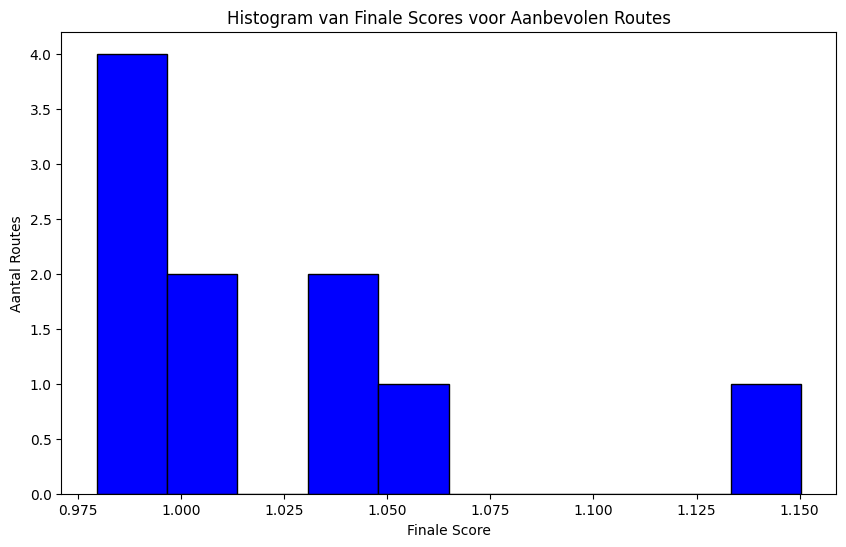

,latitude,longitude,altitude,sport,id,heart_rate,timestamp,speed,distance,altitude_change,...,orig_distance,orig_mean_altitude,orig_average_condition_value,distance_to_user,road_preference_score,surface_preference_score,preference_score,normalized_preference_score,cosine_similarity_score,final_score
49,"[55.66927408799529, 55.669254222884774, 55.669...","[12.596117975190282, 12.596132308244705, 12.59...","[-9.8, -10.0, -10.2, -10.0, -10.0, -10.0, -10....",run,502544979,"[122, 123, 123, 125, 126, 126, 127, 127, 128, ...","[1428970050, 1428970051, 1428970053, 142897005...","[8.7336, 8.7336, 10.278, 10.3464, 10.2456, 10....",-0.948119,-0.232759,...,2.546160,-5.8512,0.2111,74.304953,71.885932,137.477778,104.681855,0.175255,0.975089,1.150344
47,"[55.64162663184106, 55.641631660982966, 55.641...","[12.582142660394311, 12.582187671214342, 12.58...","[-5.8, -5.8, -5.8, -5.8, -5.6, -6.0, -6.2, -6....",run,506634965,"[144, 144, 143, 143, 143, 142, 142, 142, 143, ...","[1429549510, 1429549511, 1429549513, 142954951...","[4.8384, 10.4148, 11.4552, 11.79, 11.79, 11.95...",-0.886374,-0.120690,...,3.029529,-3.7404,0.2111,72.614844,36.307985,63.211111,49.759548,0.083021,0.977032,1.060053
72,"[55.64649894833565, 55.64643465913832, 55.6463...","[12.585655096918344, 12.58563632145524, 12.585...","[-6.6, -6.4, -6.6, -7.8, -8.6, -8.6, -8.8, -8....",run,479935014,"[150, 150, 150, 148, 147, 147, 148, 148, 148, ...","[1425408742, 1425408744, 1425408746, 142540874...","[9.6408, 12.7296, 13.3704, 13.4352, 13.4028, 1...",-0.745730,-0.120690,...,4.130543,-1.7276,0.2111,72.436433,31.174905,63.022222,47.098564,0.078553,0.967156,1.045708
57,"[55.71055479347706, 55.710530234500766, 55.710...","[12.578102415427566, 12.578104427084327, 12.57...","[30.2, 29.2, 28.2, 27.2, 26.4, 25.4, 25.0, 24....",run,495892769,"[100, 100, 100, 97, 96, 94, 92, 92, 92, 91, 90...","[1427988904, 1427988905, 1427988906, 142798890...","[11.6208, 51.1236, 51.1236, 9.81, 9.81, 9.2376...",-1.033345,0.189655,...,1.878977,8.5768,0.2111,73.801072,25.201521,102.644444,63.922983,0.106807,0.935858,1.042664
74,"[55.67326948978007, 55.67332464270294, 55.6733...","[12.526727467775345, 12.52674481831491, 12.526...","[7.0, 6.4, 6.6, 6.0, 6.2, 6.4, 6.4, 6.0, 6.0, ...",run,477836270,"[130, 131, 132, 133, 134, 134, 135, 136, 136, ...","[1424999496, 1424999498, 1424999500, 142499950...","[7.3908000000000005, 10.4148, 12.06, 12.6972, ...",-0.774967,-0.008621,...,3.901664,16.2388,0.2111,69.642334,34.471483,26.200000,30.335741,0.050402,0.962154,1.012556


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
min_max_scaler = MinMaxScaler()
user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Aangepaste aanbevelingsfunctie
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Normaliseer de preference_score met Min-Max normalisatie
    min_max_scaler = MinMaxScaler()
    routes_df['normalized_preference_score'] = min_max_scaler.fit_transform(routes_df[['preference_score']])

    # Bereken cosine similarity
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances'], user_data['average_condition_value']]])
    route_features = routes_df[['altitude_change', 'distance', 'average_condition_value']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Integreer cosine_similarity_score en normalized_preference_score om een finale score te berekenen
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['normalized_preference_score']

    # Sorteer routes op basis van de finale score en selecteer top N
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)

    # Plot een histogram van de finale scores van de aanbevolen routes
    plt.figure(figsize=(10, 6))  # Maakt een figuur met een aangepaste grootte
    plt.hist(recommended_routes['final_score'], bins=10, color='blue', edgecolor='black')  # Teken het histogram
    plt.title('Histogram van Finale Scores voor Aanbevolen Routes')  # Titel van het histogram
    plt.xlabel('Finale Score')  # X-as label
    plt.ylabel('Aantal Routes')  # Y-as label
    plt.show()  # Toont het histogram


    return recommended_routes

# Test de functie voor een specifieke gebruiker
sample_user_id = 8899244
recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)
recommended_routes.head()


Gewichten voor gebruiker 8899244: {'average_altitude_change': 0.003256593291601, 'average_distance': 0.06695833376940001, 'average_condition_value': 0.929785072938998, 'distance_to_user': 1.0, 'preference_score': 1.0}


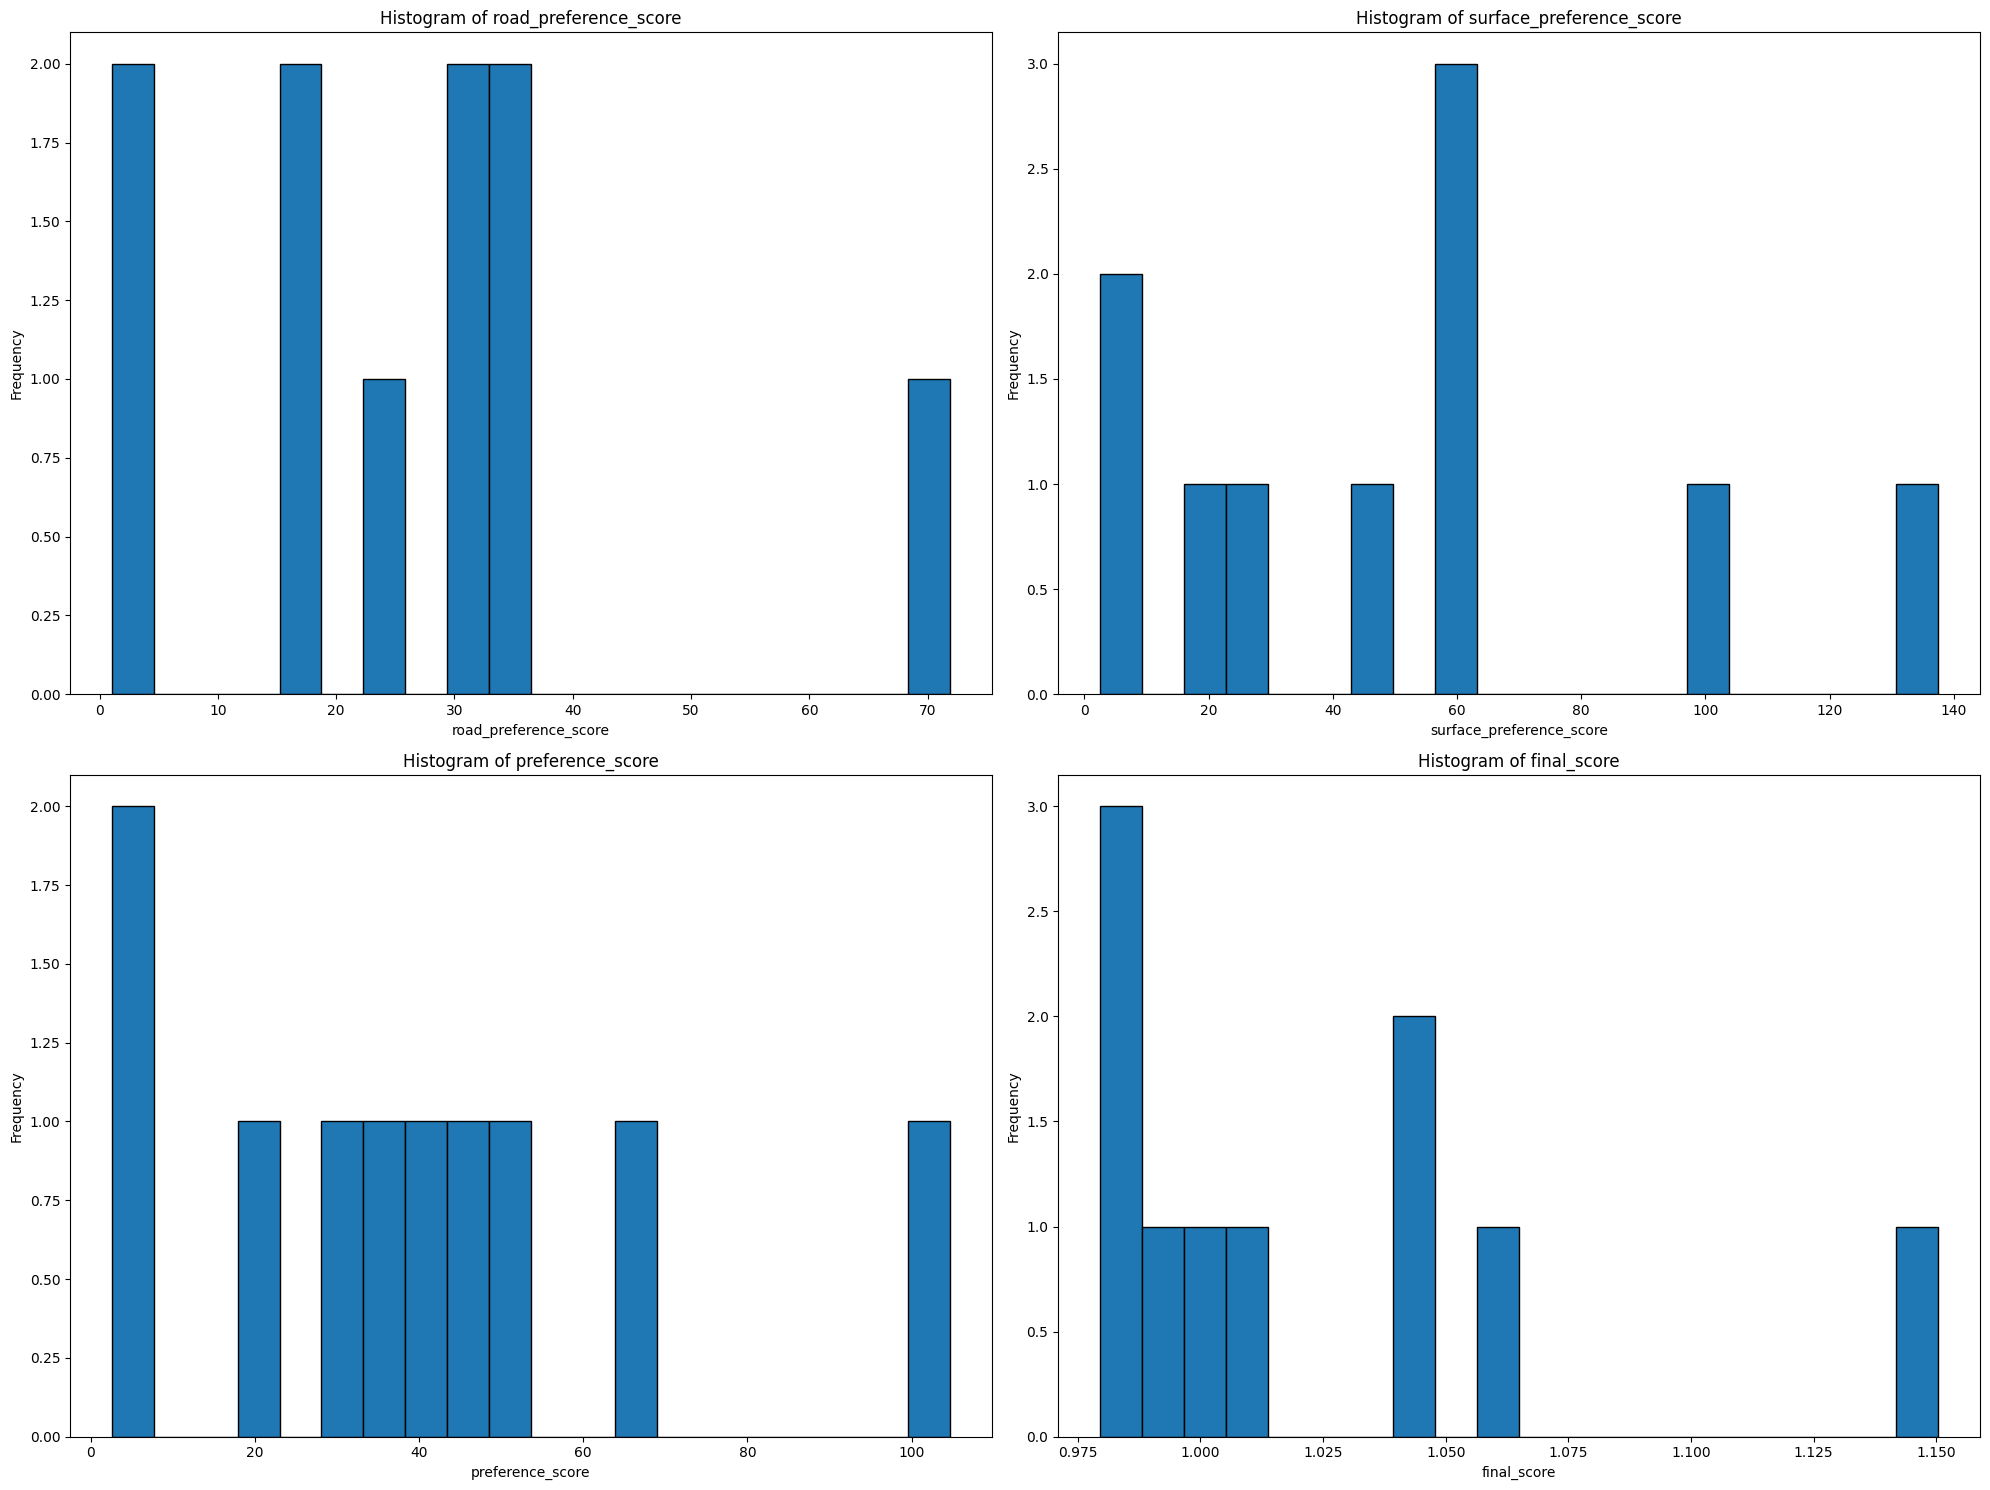

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
min_max_scaler = MinMaxScaler()
user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Functie om histograms te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, position i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Aangepaste aanbevelingsfunctie
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Normaliseer de preference_score met Min-Max normalisatie
    min_max_scaler = MinMaxScaler()
    routes_df['normalized_preference_score'] = min_max_scaler.fit_transform(routes_df[['preference_score']])

    # Bereken cosine similarity
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances'], user_data['average_condition_value']]])
    route_features = routes_df[['altitude_change', 'distance', 'average_condition_value']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Integreer cosine_similarity_score en normalized_preference_score om een finale score te berekenen
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['normalized_preference_score']

 # Selecteer top N aanbevolen routes
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)
     # Histogrammen voor de aanbevolen routes
    features_to_plot = ['road_preference_score', 'surface_preference_score', 'preference_score', 'final_score']
    plot_histograms(recommended_routes, features_to_plot)
    # Visualisatie op een kaart
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles='cartodbpositron')
    
    # Marker voor de gebruiker met uitgebreide informatie
    user_info = f"Gebruiker ID: {user_id}<br>" \
                f"Meest voorkomende locatie: Lat {user_data['most_common_lat']}, Lon {user_data['most_common_lon']}"
    folium.Marker(
        location=user_location,
        popup=user_info,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)
    
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    for _, route in recommended_routes.iterrows():
        route_coords = list(zip(route['latitude'], route['longitude']))
        # Verzamel route-informatie, inclusief weg- en ondergrondtypes indien beschikbaar
        route_info = f"Route ID: {route['id']}<br>" \
                     f"Afstand: {route['orig_distance']} km<br>" \
                     f"Verandering in hoogte: {route['orig_altitude_change']} m<br>" \
                     f"Ondergrond: {', '.join(route.get('surfaces', ['Niet gespecificeerd']))}<br>" \
                     f"Weg: {', '.join(route.get('highways', ['Niet gespecificeerd']))}"
        folium.PolyLine(
            route_coords,
            color=user_route_color,
            weight=5,
            opacity=0.7,
            popup=route_info
        ).add_to(map_obj)
    
    return map_obj

# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
sample_user_id = 8899244
map_obj = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
map_obj

Gewichten voor gebruiker 5325166: {'average_altitude_change': 0.20813618016103203, 'average_distance': 0.791863819838967, 'distance_to_user': 1.0, 'preference_score': 1.0}


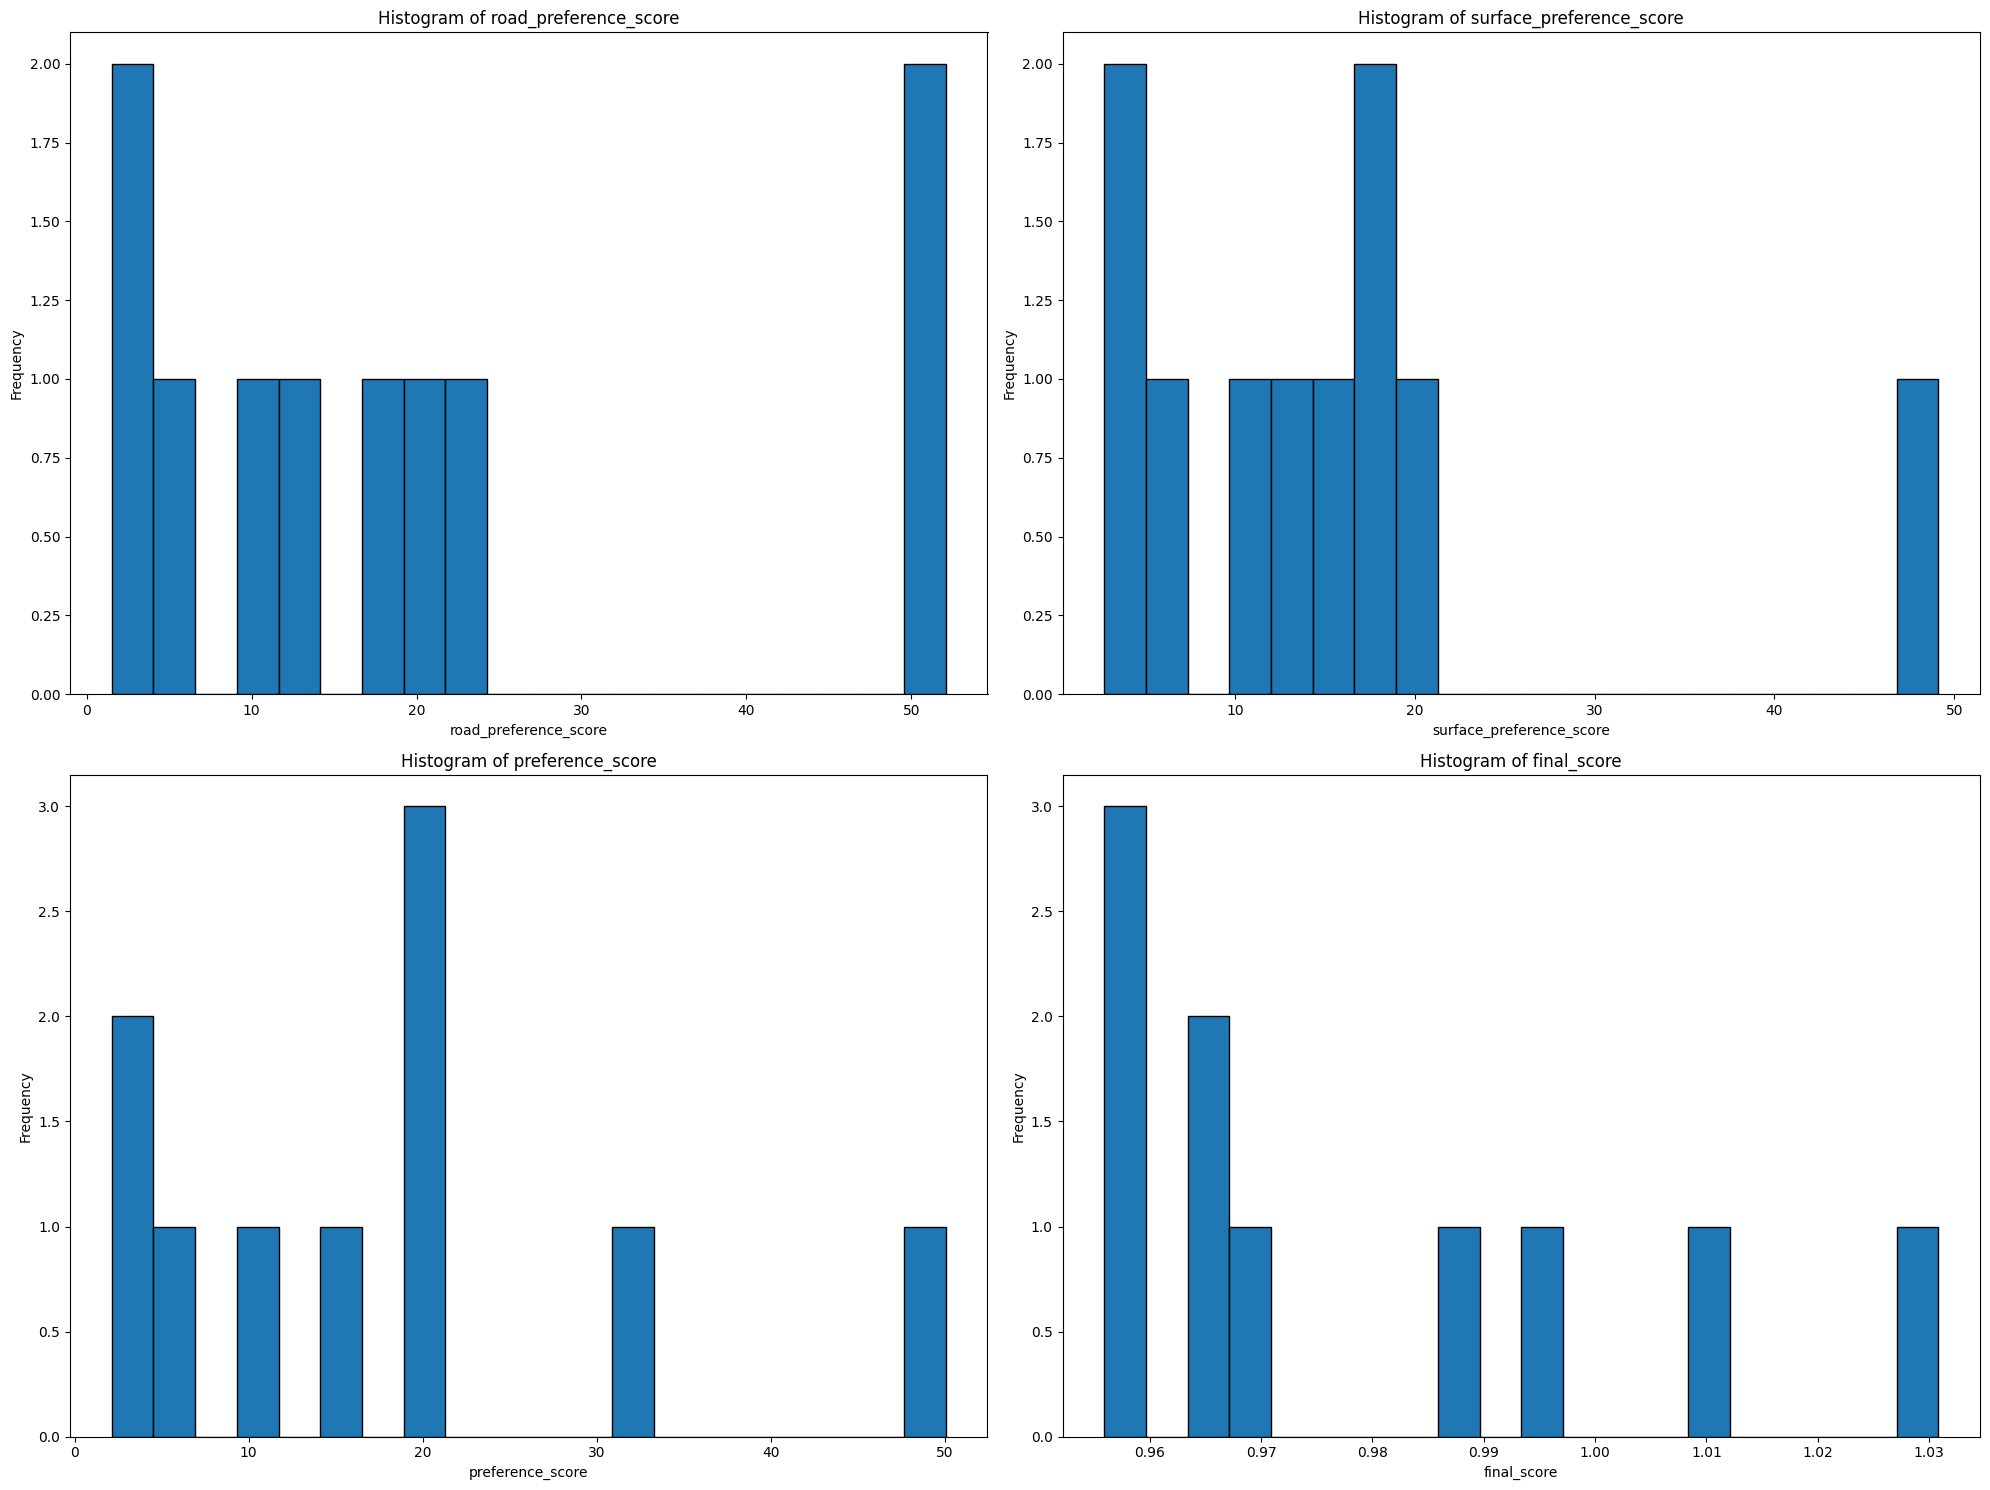

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen_v2.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# min_max_scaler = MinMaxScaler()
# user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    # condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        # 'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Functie om histograms te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, position i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Aangepaste aanbevelingsfunctie
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Normaliseer de preference_score met Min-Max normalisatie
    min_max_scaler = MinMaxScaler()
    routes_df['normalized_preference_score'] = min_max_scaler.fit_transform(routes_df[['preference_score']])

    # Bereken cosine similarity
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances']]])
    route_features = routes_df[['altitude_change', 'distance']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Integreer cosine_similarity_score en normalized_preference_score om een finale score te berekenen
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['normalized_preference_score']

 # Selecteer top N aanbevolen routes
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)
     # Histogrammen voor de aanbevolen routes
    features_to_plot = ['road_preference_score', 'surface_preference_score', 'preference_score', 'final_score']
    plot_histograms(recommended_routes, features_to_plot)
    # Visualisatie op een kaart
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles='cartodbpositron')
    
    # Marker voor de gebruiker met uitgebreide informatie
    user_info = f"Gebruiker ID: {user_id}<br>" \
                f"Meest voorkomende locatie: Lat {user_data['most_common_lat']}, Lon {user_data['most_common_lon']}"
    folium.Marker(
        location=user_location,
        popup=user_info,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)
    
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    for _, route in recommended_routes.iterrows():
        route_coords = list(zip(route['latitude'], route['longitude']))
        # Verzamel route-informatie, inclusief weg- en ondergrondtypes indien beschikbaar
        route_info = f"Route ID: {route['id']}<br>" \
                     f"Afstand: {route['orig_distance']} km<br>" \
                     f"Verandering in hoogte: {route['orig_altitude_change']} m<br>" \
                     f"Ondergrond: {', '.join(route.get('surfaces', ['Niet gespecificeerd']))}<br>" \
                     f"Weg: {', '.join(route.get('highways', ['Niet gespecificeerd']))}"
        folium.PolyLine(
            route_coords,
            color=user_route_color,
            weight=5,
            opacity=0.7,
            popup=route_info
        ).add_to(map_obj)
    
    return map_obj

# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
# sample_user_id = 8899244
sample_user_id = 5325166
map_obj = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
map_obj

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen_v2.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# min_max_scaler = MinMaxScaler()
# user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    # condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        # 'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Functie om histograms te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, position i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Aangepaste aanbevelingsfunctie
# Aangepaste aanbevelingsfunctie
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))

    # Normaliseer de road_preference_score en surface_preference_score apart
    min_max_scaler = MinMaxScaler()
    routes_df[['road_preference_score', 'surface_preference_score']] = min_max_scaler.fit_transform(routes_df[['road_preference_score', 'surface_preference_score']])


    # Bereken cosine similarity
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances']]])
    route_features = routes_df[['altitude_change', 'distance']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Integreer cosine_similarity_score en normalized_preference_score om een finale score te berekenen
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['road_preference_score'] + routes_df['surface_preference_score']

    # Filter routes om te voorkomen dat de eigen routes van de gebruiker worden aanbevolen
    routes_df_filtered = routes_df[routes_df['userId'] != user_id]  # Filter toegevoegd

    # Selecteer top N aanbevolen routes uit de gefilterde routes
    recommended_routes = routes_df_filtered.sort_values(by='final_score', ascending=False).head(top_n)
    
    # Print de ID's van de top N aanbevolen routes
    print("ID's van de 10 beste aanbevolen routes:")
    print(recommended_routes['id'].tolist())
    
    return recommended_routes


# Functie om aanbevolen routes op een kaart te visualiseren
# Functie om aanbevolen routes op een kaart te visualiseren
# Functie om aanbevolen routes op een kaart te visualiseren
def visualize_routes_on_map(user_id, user_profiles_df, recommended_routes):
    # Vind de locatie van de gebruiker en zijn/haar voorkeuren
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])
    user_distance = user_data['average_distances']
    user_road_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_wegen'].items()])
    user_surface_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_ondergronden'].items()])

    # Maak een Folium-kaart met de locatie van de gebruiker als middelpunt
    map_obj = folium.Map(location=user_location, zoom_start=12)

    # Voeg een marker toe voor de locatie van de gebruiker
    folium.Marker(
        location=user_location,
        popup=f'Gebruiker {user_id}<br>Gemiddelde afstand {user_distance} <br>Wegvoorkeuren: {user_road_prefs}<br>Ondergrondvoorkeuren: {user_surface_prefs}',
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)

    # Voeg de aanbevolen routes toe aan de kaart
    for index, route in recommended_routes.iterrows():
        route_coords = list(zip(route['latitude'], route['longitude']))
        # Verzamel weg- en ondergrondinformatie van de route
        route_highways_info = ', '.join([f"{k}: {v}" for k, v in route['highways'].items()])
        route_surfaces_info = ', '.join([f"{k}: {v}" for k, v in route['surfaces'].items()])
        folium.PolyLine(
            route_coords,
            color='blue',
            weight=5,
            opacity=0.7,
            popup=(f"Route ID: {route['id']}<br>"
                   f"Afstand: {route['orig_distance']} km<br>"
                   f"Hoogteverandering: {route['orig_altitude_change']} m<br>"
                #    f"Voorkeursscore: {route['preference_score']}<br>"
                   f"Wegen: {route_highways_info}<br>"
                   f"Ondergronden: {route_surfaces_info}")
        ).add_to(map_obj)

    return map_obj

# Aanroepen van de functie om de kaart te genereren en weer te geven
map_obj = visualize_routes_on_map(sample_user_id, user_profiles_df, recommended_routes)
map_obj


# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
# sample_user_id = 8974660
sample_user_id = 8899244
# sample_user_id = 5325166
# sample_user_id = 6361870
recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
recommended_routes.head()

# Visualiseer de aanbevolen routes voor een specifieke gebruiker op een kaart
map_obj = visualize_routes_on_map(sample_user_id, user_profiles_df, recommended_routes)

# In een Jupyter-notebook, toon de kaart direct
map_obj

Gewichten voor gebruiker 8899244: {'average_altitude_change': 0.046380355686481, 'average_distance': 0.9536196443135181, 'distance_to_user': 1.0, 'preference_score': 1.0}
ID's van de 10 beste aanbevolen routes:
[469691679, 502544979, 506634965, 479935014, 495892769, 477836270, 475487335, 502544947, 492447338, 476615400]


Gewichten voor gebruiker 6361870: {'average_altitude_change': 0.111423194692417, 'average_distance': 0.8885768053075821, 'distance_to_user': 1.0, 'preference_score': 1.0}
ID's van de 10 beste aanbevolen routes:
[524951979, 470769469, 472136509, 618512363, 590393595, 474085981, 478468659, 619409589, 489745600, 469691681]


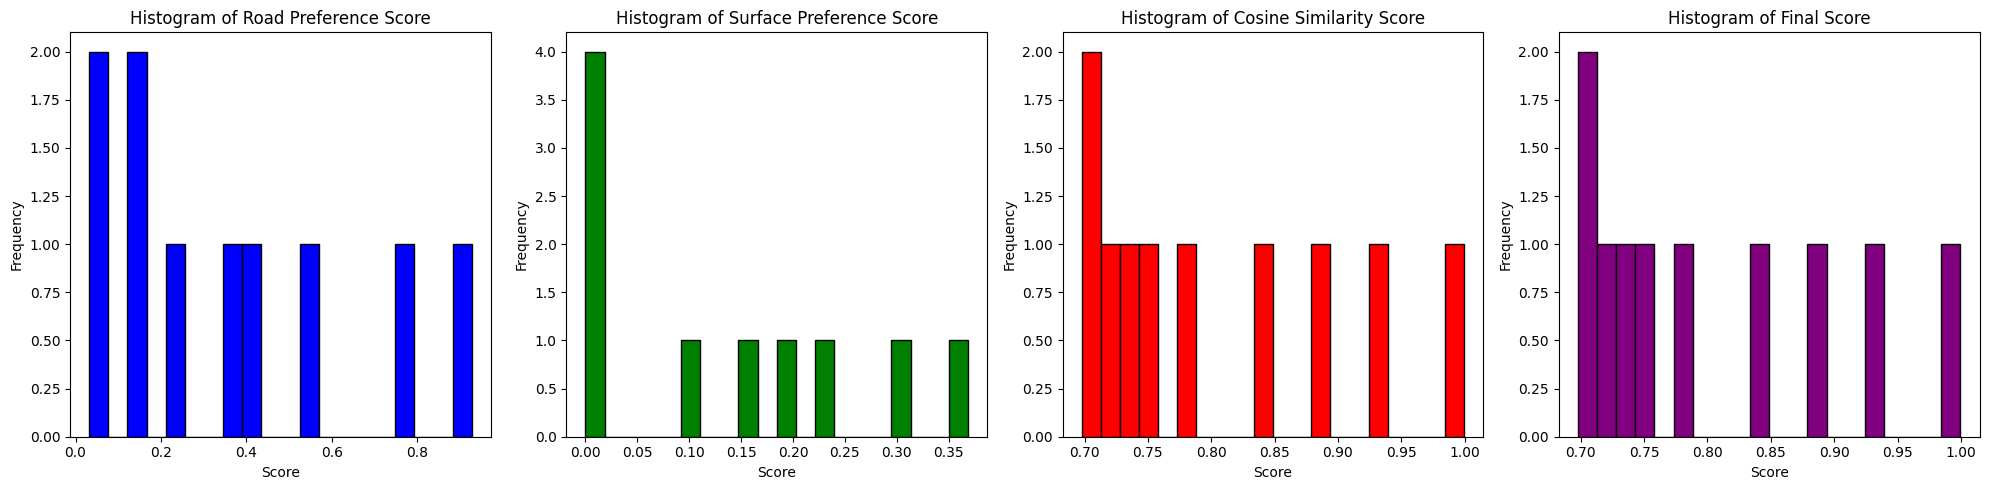

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen_v2.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# min_max_scaler = MinMaxScaler()
# user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    # condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        # 'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    # Normaliseer de frequenties in de gebruikersvoorkeuren en route kenmerken
    total_user_pref = sum(user_preferences.values())
    total_route_feat = sum(route_features.values())
    
    score = 0
    for feature_type in user_preferences.keys():
        user_freq = user_preferences.get(feature_type, 0) / total_user_pref
        route_freq = route_features.get(feature_type, 0) / total_route_feat
        # Gebruik het minimum van gebruikersfreq en routefreq om overeenkomst te beoordelen
        score += min(user_freq, route_freq)
    # Verhoog de score om een beter onderscheid tussen routes te bieden
    return score * 100

# Functie om histograms te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, position i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Aangepaste aanbevelingsfunctie
# Aangepaste aanbevelingsfunctie met geïntegreerde voorkeursscoreberekening
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic((user_data['most_common_lat'], user_data['most_common_lon']), (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen met de aangepaste functie
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda highways: calculate_preference_score(user_data['voorkeur_wegen'], highways))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda surfaces: calculate_preference_score(user_data['voorkeur_ondergronden'], surfaces))

    # Normaliseer de voorkeursscores
    scaler = MinMaxScaler()
    routes_df[['road_preference_score', 'surface_preference_score']] = scaler.fit_transform(routes_df[['road_preference_score', 'surface_preference_score']])

    # Bereken cosine similarity voor niet-locatie gebaseerde kenmerken
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances']]])
    route_features = routes_df[['altitude_change', 'distance']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Bereken de finale score
    # routes_df['final_score'] = routes_df['cosine_similarity_score'] + (routes_df['road_preference_score']/8) + (routes_df['surface_preference_score']/8)
    routes_df['final_score'] = routes_df['cosine_similarity_score']
    # Filter routes om te voorkomen dat de eigen routes van de gebruiker worden aanbevolen
    routes_df_filtered = routes_df[routes_df['userId'] != user_id]

    # Selecteer top N aanbevolen routes
    recommended_routes = routes_df_filtered.sort_values(by='final_score', ascending=False).head(top_n)
    
    print("ID's van de 10 beste aanbevolen routes:")
    print(recommended_routes['id'].tolist())
    
    return recommended_routes


# Functie om aanbevolen routes op een kaart te visualiseren
def visualize_routes_on_map(user_id, user_profiles_df, recommended_routes):
    # Vind de locatie van de gebruiker en zijn/haar voorkeuren
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])
    user_distance = user_data['orig_average_distances']
    user_road_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_wegen'].items()])
    user_surface_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_ondergronden'].items()])

    # Maak een Folium-kaart met de locatie van de gebruiker als middelpunt
    map_obj = folium.Map(location=user_location, zoom_start=12)

    # Voeg een marker toe voor de locatie van de gebruiker
    folium.Marker(
        location=user_location,
        popup=f'Gebruiker {user_id}<br>Gemiddelde afstand {user_distance} <br>Wegvoorkeuren: {user_road_prefs}<br>Ondergrondvoorkeuren: {user_surface_prefs}',
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)

    # Voeg de aanbevolen routes toe aan de kaart
    for index, route in recommended_routes.iterrows():
        route_coords = list(zip(route['latitude'], route['longitude']))
        # Verzamel weg- en ondergrondinformatie van de route
        route_highways_info = ', '.join([f"{k}: {v}" for k, v in route['highways'].items()])
        route_surfaces_info = ', '.join([f"{k}: {v}" for k, v in route['surfaces'].items()])
        folium.PolyLine(
            route_coords,
            color='blue',
            weight=5,
            opacity=0.7,
            popup=(f"Route ID: {route['id']}<br>"
                   f"Afstand: {route['orig_distance']} km<br>"
                   f"Hoogteverandering: {route['orig_altitude_change']} m<br>"
                #    f"Voorkeursscore: {route['preference_score']}<br>"
                   f"Wegen: {route_highways_info}<br>"
                   f"Ondergronden: {route_surfaces_info}")
        ).add_to(map_obj)

    return map_obj
# Functie om histograms te plotten voor de gegeven features
def plot_histograms_for_scores(routes_df, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    
    # Histogram voor road_preference_score
    plt.subplot(1, 4, 1)  # 1x4 grid, positie 1
    plt.hist(routes_df['road_preference_score'], bins=20, edgecolor='black', color='blue')
    plt.title('Histogram of Road Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor surface_preference_score
    plt.subplot(1, 4, 2)  # 1x4 grid, positie 2
    plt.hist(routes_df['surface_preference_score'], bins=20, edgecolor='black', color='green')
    plt.title('Histogram of Surface Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor cosine_similarity_score
    plt.subplot(1, 4, 3)  # 1x4 grid, positie 3
    plt.hist(routes_df['cosine_similarity_score'], bins=20, edgecolor='black', color='red')
    plt.title('Histogram of Cosine Similarity Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor final_score
    plt.subplot(1, 4, 4)  # 1x4 grid, positie 4
    plt.hist(routes_df['final_score'], bins=20, edgecolor='black', color='purple')
    plt.title('Histogram of Final Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
# sample_user_id = 8974660
# sample_user_id = 8899244
# sample_user_id = 5325166
sample_user_id = 6361870
recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
recommended_routes.head()
plot_histograms_for_scores(recommended_routes)
# Visualiseer de aanbevolen routes voor een specifieke gebruiker op een kaart
map_obj = visualize_routes_on_map(sample_user_id, user_profiles_df, recommended_routes)

# In een Jupyter-notebook, toon de kaart direct
map_obj

ID's van de 10 beste aanbevolen routes:
[478468659, 489745600, 469691681, 475487335, 467598024, 502544979, 481893279, 487521338, 493364658, 485190571]


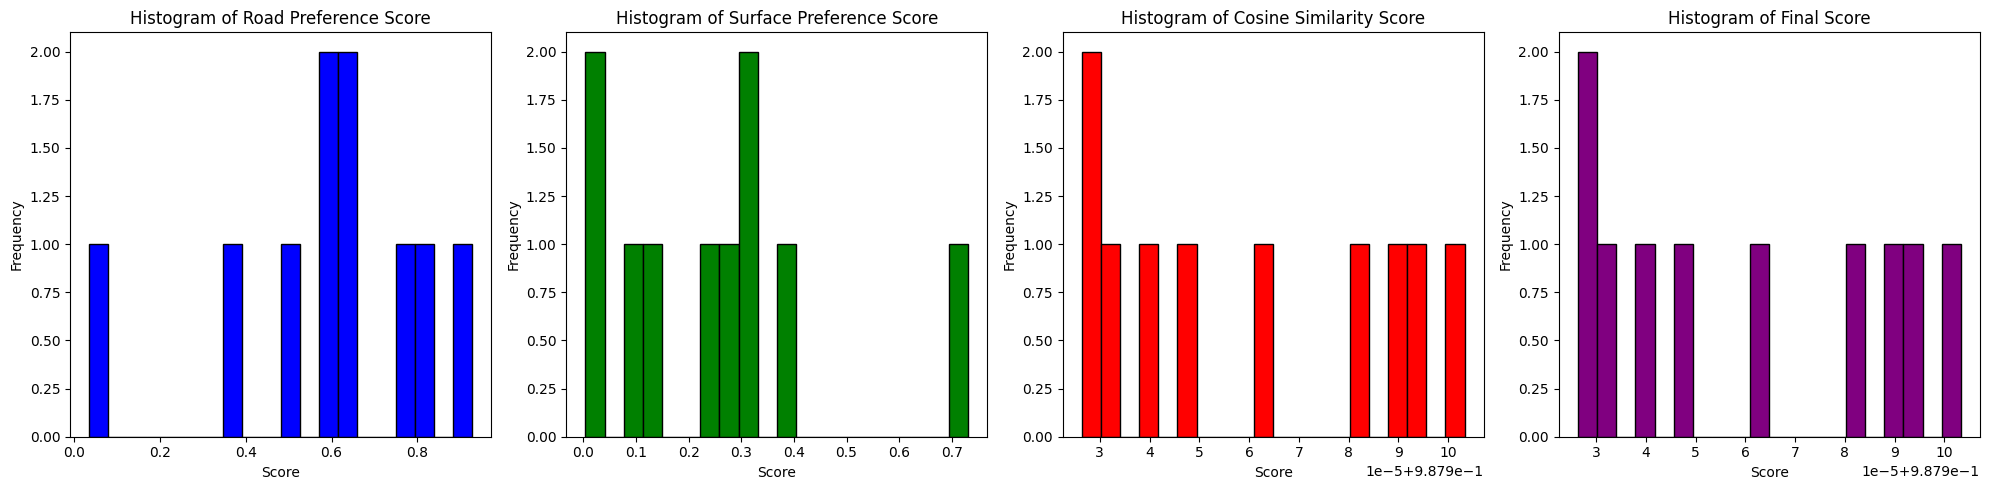

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen_v2.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# min_max_scaler = MinMaxScaler()
# user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    # condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        # 'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    # Normaliseer de frequenties in de gebruikersvoorkeuren en route kenmerken
    total_user_pref = sum(user_preferences.values())
    total_route_feat = sum(route_features.values())
    
    score = 0
    for feature_type in user_preferences.keys():
        user_freq = user_preferences.get(feature_type, 0) / total_user_pref
        route_freq = route_features.get(feature_type, 0) / total_route_feat
        # Gebruik het minimum van gebruikersfreq en routefreq om overeenkomst te beoordelen
        score += min(user_freq, route_freq)
    # Verhoog de score om een beter onderscheid tussen routes te bieden
    return score * 100

# Functie om histograms te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, position i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Aangepaste aanbevelingsfunctie
# Aangepaste aanbevelingsfunctie met geïntegreerde voorkeursscoreberekening
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id not in gewichten:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(
        (user_data['most_common_lat'], user_data['most_common_lon']), 
        (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    user_weights = gewichten[user_id]
    
    # Pas gebruikersgewichten toe op de gebruikersfeatures voor cosine similarity berekening
    weighted_user_features = np.array([
        user_data['average_altitude_changes'] * user_weights['average_altitude_change'],
        user_data['average_distances'] * user_weights['average_distance'],
        1 * user_weights['distance_to_user']  # Voor distance_to_user wordt verondersteld dat deze altijd 1 is
    ]).reshape(1, -1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda highways: calculate_preference_score(user_data['voorkeur_wegen'], highways))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda surfaces: calculate_preference_score(user_data['voorkeur_ondergronden'], surfaces))

    # Normaliseer de voorkeursscores
    scaler = MinMaxScaler()
    routes_df[['road_preference_score', 'surface_preference_score']] = scaler.fit_transform(routes_df[['road_preference_score', 'surface_preference_score']])

    # Pas route features aan voor cosine similarity berekening
    route_features = routes_df[['altitude_change', 'distance', 'distance_to_user']].to_numpy()

    # Bereken cosine similarity tussen gebruiker en routes
    routes_df['cosine_similarity_score'] = cosine_similarity(weighted_user_features, route_features).flatten()

    # Bereken de finale score, je kunt hier besluiten of je de voorkeursscores wilt meewegen in de finale score
    routes_df['final_score'] = routes_df['cosine_similarity_score']  # Pas indien nodig aan om voorkeursscores mee te nemen

    # Filter routes om te voorkomen dat de eigen routes van de gebruiker worden aanbevolen
    routes_df_filtered = routes_df[routes_df['userId'] != user_id]

    # Selecteer top N aanbevolen routes
    recommended_routes = routes_df_filtered.sort_values(by='final_score', ascending=False).head(top_n)
    
    print("ID's van de 10 beste aanbevolen routes:")
    print(recommended_routes['id'].tolist())
    
    return recommended_routes



# Functie om aanbevolen routes op een kaart te visualiseren
def visualize_routes_on_map(user_id, user_profiles_df, recommended_routes):
    # Vind de locatie van de gebruiker en zijn/haar voorkeuren
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])
    user_distance = user_data['orig_average_distances']
    user_road_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_wegen'].items()])
    user_surface_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_ondergronden'].items()])

    # Maak een Folium-kaart met de locatie van de gebruiker als middelpunt
    map_obj = folium.Map(location=user_location, zoom_start=12)

    # Voeg een marker toe voor de locatie van de gebruiker
    folium.Marker(
        location=user_location,
        popup=f'Gebruiker {user_id}<br>Gemiddelde afstand {user_distance} <br>Wegvoorkeuren: {user_road_prefs}<br>Ondergrondvoorkeuren: {user_surface_prefs}',
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)

    # Voeg de aanbevolen routes toe aan de kaart
    for index, route in recommended_routes.iterrows():
        route_coords = list(zip(route['latitude'], route['longitude']))
        # Verzamel weg- en ondergrondinformatie van de route
        route_highways_info = ', '.join([f"{k}: {v}" for k, v in route['highways'].items()])
        route_surfaces_info = ', '.join([f"{k}: {v}" for k, v in route['surfaces'].items()])
        folium.PolyLine(
            route_coords,
            color='blue',
            weight=5,
            opacity=0.7,
            popup=(f"Route ID: {route['id']}<br>"
                   f"Afstand: {route['orig_distance']} km<br>"
                   f"Hoogteverandering: {route['orig_altitude_change']} m<br>"
                #    f"Voorkeursscore: {route['preference_score']}<br>"
                   f"Wegen: {route_highways_info}<br>"
                   f"Ondergronden: {route_surfaces_info}")
        ).add_to(map_obj)

    return map_obj
# Functie om histograms te plotten voor de gegeven features
def plot_histograms_for_scores(routes_df, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    
    # Histogram voor road_preference_score
    plt.subplot(1, 4, 1)  # 1x4 grid, positie 1
    plt.hist(routes_df['road_preference_score'], bins=20, edgecolor='black', color='blue')
    plt.title('Histogram of Road Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor surface_preference_score
    plt.subplot(1, 4, 2)  # 1x4 grid, positie 2
    plt.hist(routes_df['surface_preference_score'], bins=20, edgecolor='black', color='green')
    plt.title('Histogram of Surface Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor cosine_similarity_score
    plt.subplot(1, 4, 3)  # 1x4 grid, positie 3
    plt.hist(routes_df['cosine_similarity_score'], bins=20, edgecolor='black', color='red')
    plt.title('Histogram of Cosine Similarity Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor final_score
    plt.subplot(1, 4, 4)  # 1x4 grid, positie 4
    plt.hist(routes_df['final_score'], bins=20, edgecolor='black', color='purple')
    plt.title('Histogram of Final Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
# sample_user_id = 8974660
# sample_user_id = 8899244
# sample_user_id = 5325166
sample_user_id = 6361870
recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
recommended_routes.head()
plot_histograms_for_scores(recommended_routes)
# Visualiseer de aanbevolen routes voor een specifieke gebruiker op een kaart
map_obj = visualize_routes_on_map(sample_user_id, user_profiles_df, recommended_routes)

# In een Jupyter-notebook, toon de kaart direct
map_obj

Gewichten voor gebruiker 5325166: {'average_altitude_change': 0.20813618016103203, 'average_distance': 0.791863819838967, 'distance_to_user': 1.0, 'preference_score': 1.0}
ID's van de 10 beste aanbevolen routes:
[478468659, 476615400, 474085981, 502544979, 489745600, 524951979, 475487335, 618512363, 469691681, 506634965]


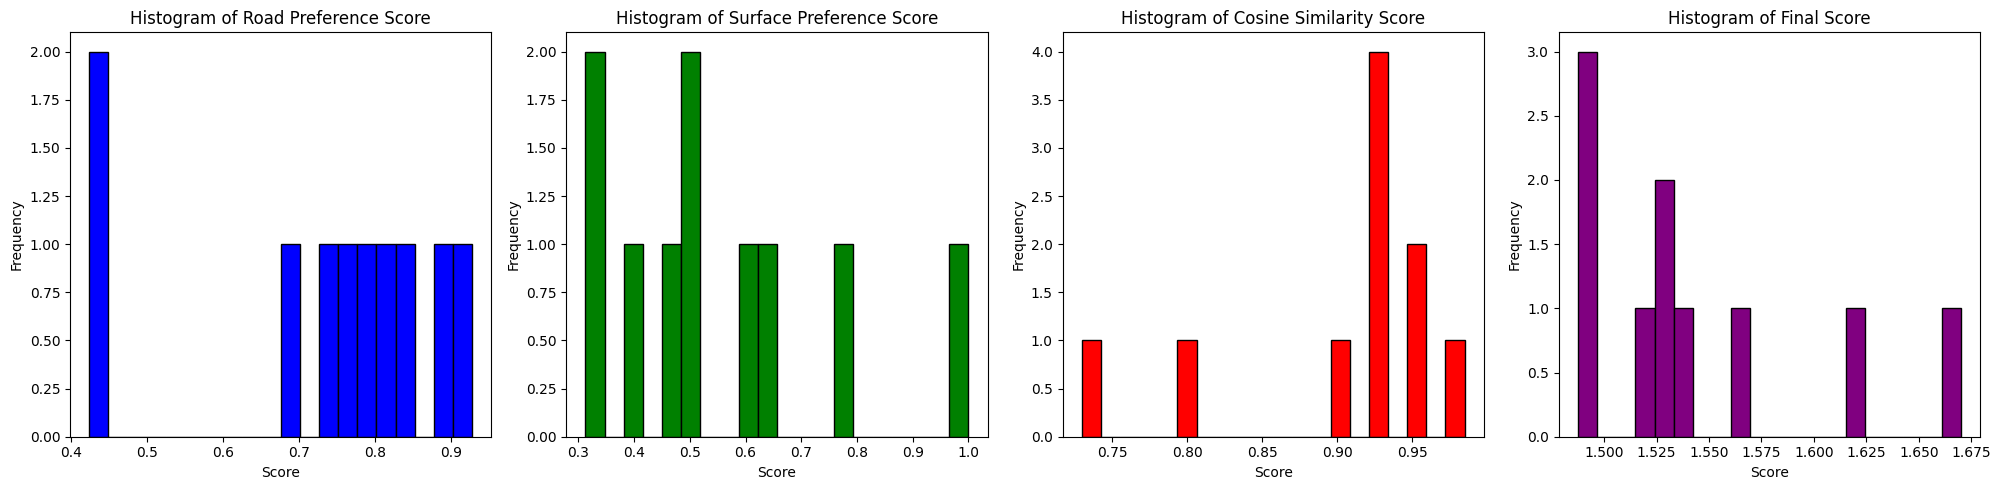

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen_v2.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
# min_max_scaler = MinMaxScaler()
# user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    # condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        # 'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    # Normaliseer de frequenties in de gebruikersvoorkeuren en route kenmerken
    total_user_pref = sum(user_preferences.values())
    total_route_feat = sum(route_features.values())
    
    score = 0
    for feature_type in user_preferences.keys():
        user_freq = user_preferences.get(feature_type, 0) / total_user_pref
        route_freq = route_features.get(feature_type, 0) / total_route_feat
        # Gebruik het minimum van gebruikersfreq en routefreq om overeenkomst te beoordelen
        score += min(user_freq, route_freq)
    # Verhoog de score om een beter onderscheid tussen routes te bieden
    return score * 100

# Functie om histograms te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, position i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Aangepaste aanbevelingsfunctie
# Aangepaste aanbevelingsfunctie met geïntegreerde voorkeursscoreberekening
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]

    # Bereken de afstand tussen de gebruiker en elke route
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic((user_data['most_common_lat'], user_data['most_common_lon']), (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen met de aangepaste functie
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda highways: calculate_preference_score(user_data['voorkeur_wegen'], highways))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda surfaces: calculate_preference_score(user_data['voorkeur_ondergronden'], surfaces))

    # Normaliseer de voorkeursscores
    scaler = MinMaxScaler()
    routes_df[['road_preference_score', 'surface_preference_score']] = scaler.fit_transform(routes_df[['road_preference_score', 'surface_preference_score']])

    # Bereken cosine similarity voor niet-locatie gebaseerde kenmerken
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances']]])
    route_features = routes_df[['altitude_change', 'distance']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Bereken de finale score
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['road_preference_score']/2 + routes_df['surface_preference_score']/2

    # Filter routes om te voorkomen dat de eigen routes van de gebruiker worden aanbevolen
    routes_df_filtered = routes_df[routes_df['userId'] != user_id]

    # Selecteer top N aanbevolen routes
    recommended_routes = routes_df_filtered.sort_values(by='final_score', ascending=False).head(top_n)
    
    print("ID's van de 10 beste aanbevolen routes:")
    print(recommended_routes['id'].tolist())
    
    return recommended_routes


# Functie om aanbevolen routes op een kaart te visualiseren
def visualize_routes_on_map(user_id, user_profiles_df, recommended_routes):
    # Vind de locatie van de gebruiker en zijn/haar voorkeuren
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])
    user_distance = user_data['orig_average_distances']
    user_road_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_wegen'].items()])
    user_surface_prefs = ', '.join([f"{k}: {v}" for k, v in user_data['voorkeur_ondergronden'].items()])

    # Maak een Folium-kaart met de locatie van de gebruiker als middelpunt
    map_obj = folium.Map(location=user_location, zoom_start=12)

    # Voeg een marker toe voor de locatie van de gebruiker
    folium.Marker(
        location=user_location,
        popup=f'Gebruiker {user_id}<br>Gemiddelde afstand {user_distance} <br>Wegvoorkeuren: {user_road_prefs}<br>Ondergrondvoorkeuren: {user_surface_prefs}',
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)

    # Lijst van kleuren voor de routes
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
    
    # Voeg de aanbevolen routes toe aan de kaart, elke route in een verschillende kleur
    for index, (route, color) in enumerate(zip(recommended_routes.iterrows(), colors), start=1):
        _, route = route  # Uitpakken van iterrows() resultaat
        route_coords = list(zip(route['latitude'], route['longitude']))
        # Verzamel weg- en ondergrondinformatie van de route
        route_highways_info = ', '.join([f"{k}: {v}" for k, v in route['highways'].items()])
        route_surfaces_info = ', '.join([f"{k}: {v}" for k, v in route['surfaces'].items()])
        folium.PolyLine(
            route_coords,
            color=color,  # Gebruik kleur van de kleurenlijst
            weight=5,
            opacity=0.7,
            popup=(f"Route ID: {route['id']}<br>"
                   f"Afstand: {route['orig_distance']} km<br>"
                   f"Hoogteverandering: {route['orig_altitude_change']} m<br>"
                   f"Wegen: {route_highways_info}<br>"
                   f"Ondergronden: {route_surfaces_info}")
        ).add_to(map_obj)
        if index == len(colors):  # Herstart kleuren als ze opraken
            index = 0

    return map_obj
# Functie om histograms te plotten voor de gegeven features
def plot_histograms_for_scores(routes_df, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    
    # Histogram voor road_preference_score
    plt.subplot(1, 4, 1)  # 1x4 grid, positie 1
    plt.hist(routes_df['road_preference_score'], bins=20, edgecolor='black', color='blue')
    plt.title('Histogram of Road Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor surface_preference_score
    plt.subplot(1, 4, 2)  # 1x4 grid, positie 2
    plt.hist(routes_df['surface_preference_score'], bins=20, edgecolor='black', color='green')
    plt.title('Histogram of Surface Preference Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor cosine_similarity_score
    plt.subplot(1, 4, 3)  # 1x4 grid, positie 3
    plt.hist(routes_df['cosine_similarity_score'], bins=20, edgecolor='black', color='red')
    plt.title('Histogram of Cosine Similarity Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    # Histogram voor final_score
    plt.subplot(1, 4, 4)  # 1x4 grid, positie 4
    plt.hist(routes_df['final_score'], bins=20, edgecolor='black', color='purple')
    plt.title('Histogram of Final Score')
    plt.xlabel('Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
# sample_user_id = 8974660
# sample_user_id = 8899244
sample_user_id = 5325166
# sample_user_id = 6361870
recommended_routes = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
recommended_routes.head()
plot_histograms_for_scores(recommended_routes)
# Visualiseer de aanbevolen routes voor een specifieke gebruiker op een kaart
map_obj = visualize_routes_on_map(sample_user_id, user_profiles_df, recommended_routes)

# In een Jupyter-notebook, toon de kaart direct
map_obj

## Betere structuur

Gewichten voor gebruiker 5325166: {'average_altitude_change': 0.026189495440149, 'average_distance': 0.09963915876061301, 'average_condition_value': 0.874171345799237, 'distance_to_user': 1.0, 'preference_score': 1.0}


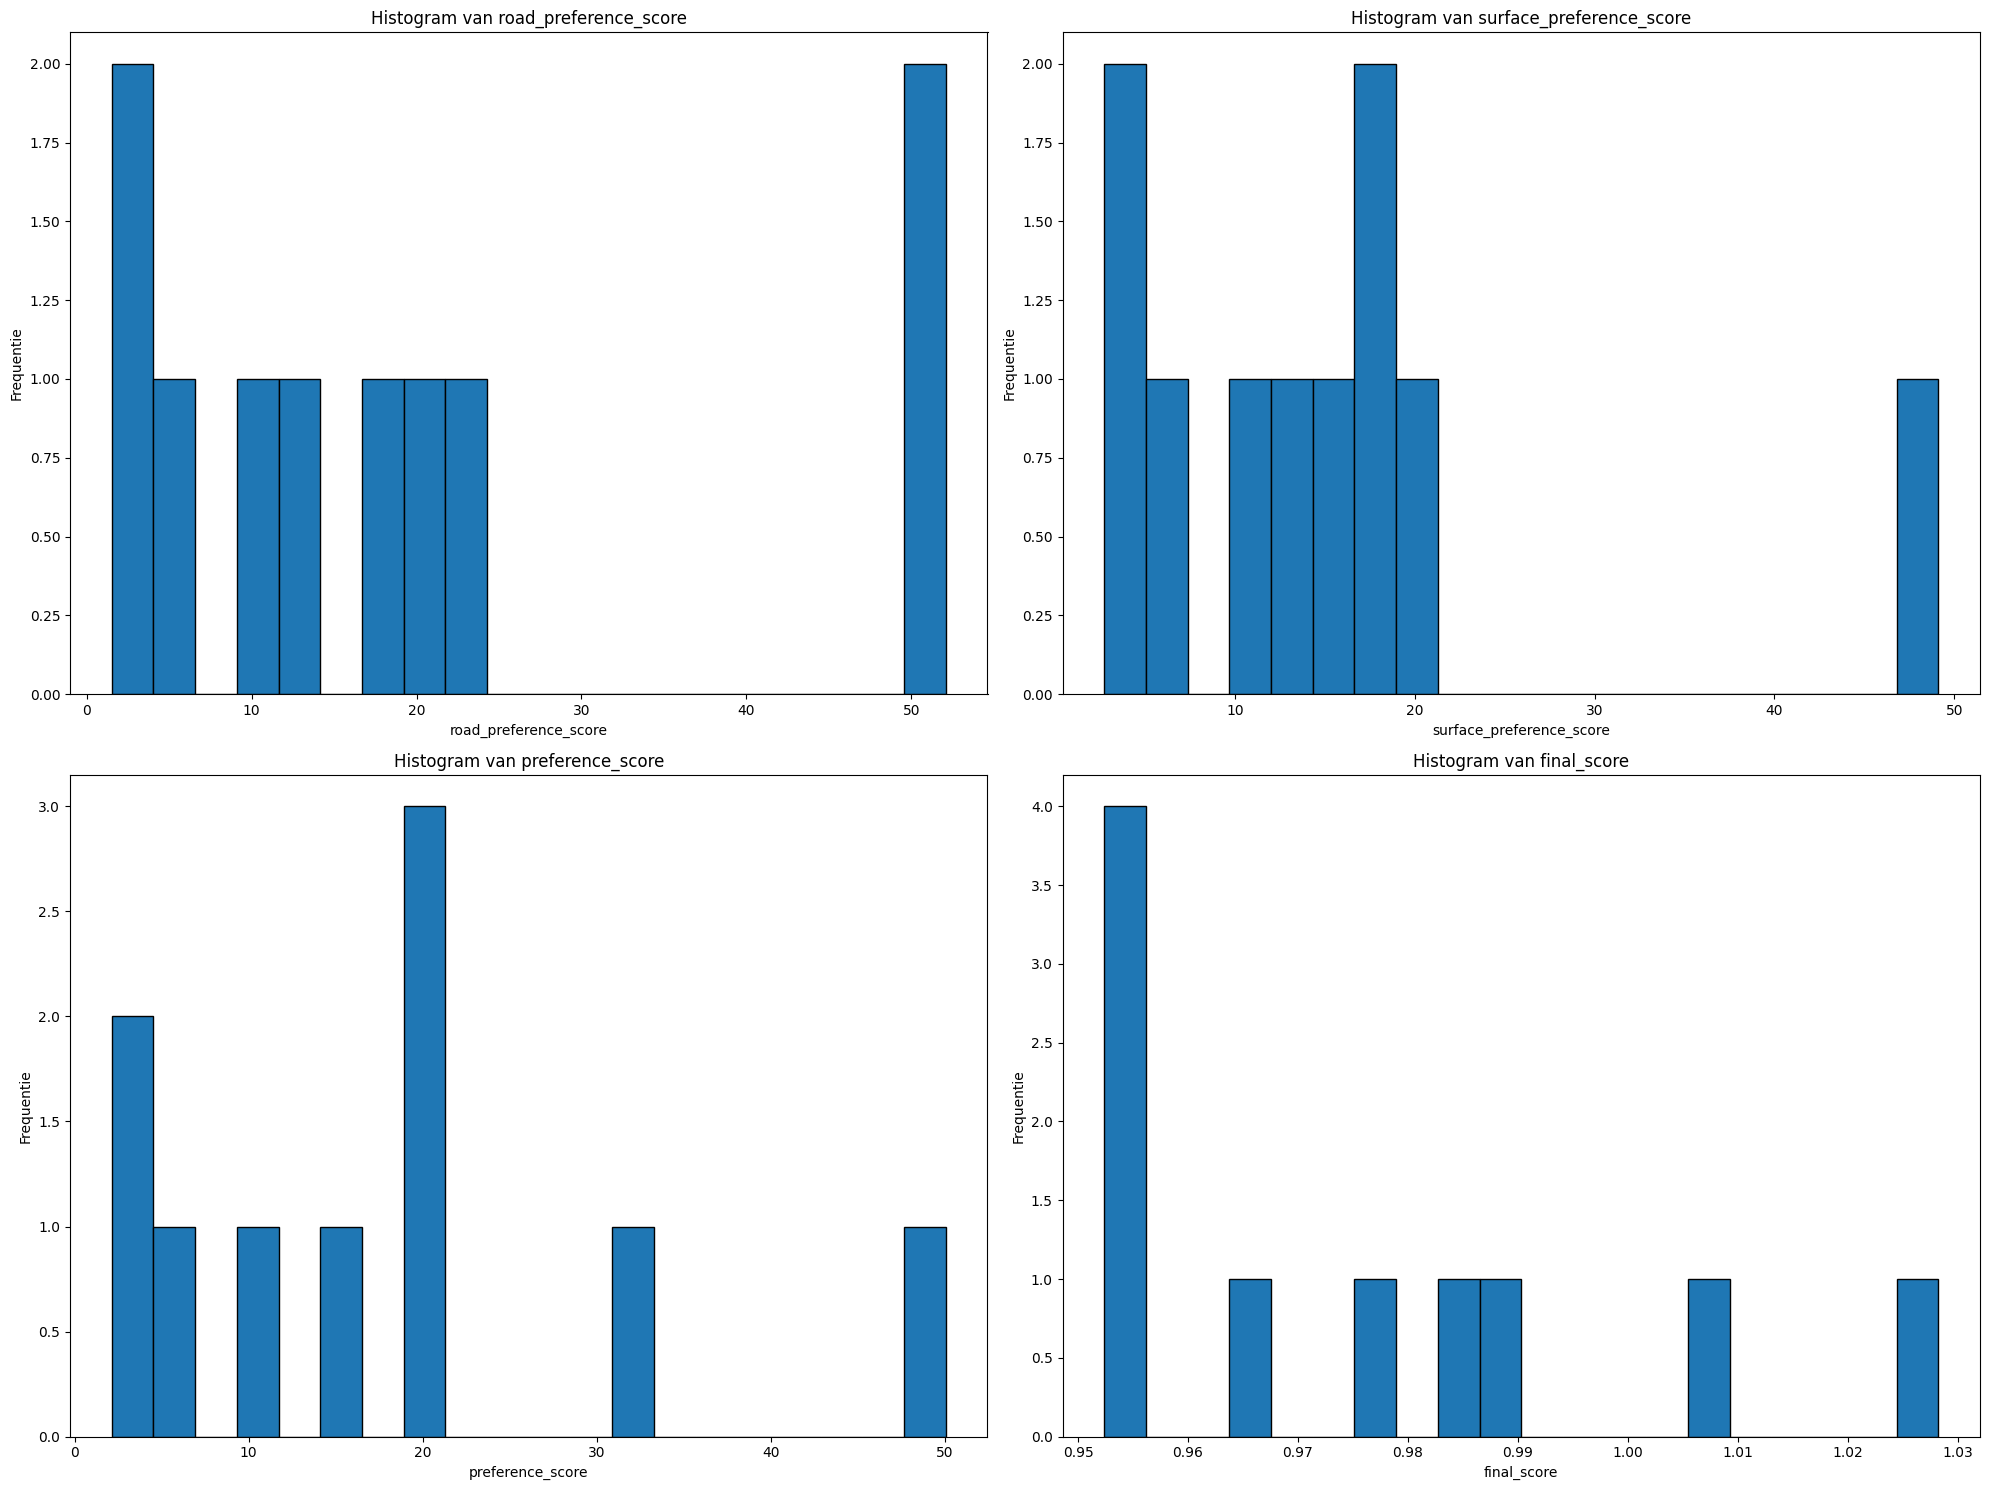

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    """
    Bereken de voorkeursscore voor een route op basis van gebruikersvoorkeuren en routekenmerken.

    Parameters:
        user_preferences (dict): Voorkeuren van de gebruiker.
        route_features (dict): Kenmerken van de route.

    Returns:
        float: Voorkeursscore voor de route.
    """
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Functie om histogrammen te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    """
    Plot histogrammen voor de gegeven features van de routes.

    Parameters:
        routes_df (DataFrame): DataFrame met routegegevens.
        features (list): Lijst van features om histogrammen van te plotten.
        bins (int, optional): Aantal bins voor de histogrammen. Standaard is 20.
        figsize (tuple, optional): Grootte van de figuur. Standaard is (20, 15).
    """
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, positie i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram van {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequentie')
    plt.tight_layout()
    plt.show()

# Functie om routes aan te bevelen voor een gebruiker
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    """
    Beveel routes aan voor een specifieke gebruiker en visualiseer de resultaten.

    Parameters:
        user_id (int): ID van de gebruiker.
        user_profiles_df (DataFrame): DataFrame met gebruikersprofielen.
        routes_df (DataFrame): DataFrame met routegegevens.
        user_route_color (str, optional): Kleur van de route van de gebruiker op de kaart. Standaard is 'red'.
        top_n (int, optional): Aantal topaanbevolen routes om weer te geven. Standaard is 10.

    Returns:
        folium.Map: Kaartobject met aanbevolen routes en gebruikerslocatie.
    """
    # Genereren van een lijst met kleuren voor de visualisatie van routes
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
              'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
              'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
              'gray', 'black', 'lightgray']
    # Controleren of de gebruiker in de gewichten staat
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    # Gebruikersgegevens en locatie ophalen
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Afstand tussen gebruiker en elke route berekenen
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Normaliseer de preference_score met Min-Max normalisatie
    min_max_scaler = MinMaxScaler()
    routes_df['normalized_preference_score'] = min_max_scaler.fit_transform(routes_df[['preference_score']])

    # Cosine similarity berekenen
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances'], user_data['average_condition_value']]])
    route_features = routes_df[['altitude_change', 'distance', 'average_condition_value']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Finale score berekenen door cosine_similarity_score en normalized_preference_score te integreren
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['normalized_preference_score']

    # Top N aanbevolen routes selecteren
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)

    # Histogrammen voor de aanbevolen routes plotten
    features_to_plot = ['road_preference_score', 'surface_preference_score', 'preference_score', 'final_score']
    plot_histograms(recommended_routes, features_to_plot)

    # Visualisatie op een kaart
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles='cartodbpositron')
    
    # Marker voor de gebruiker met uitgebreide informatie
    user_info = f"Gebruiker ID: {user_id}<br>" \
                f"Meest voorkomende locatie: Lat {user_data['most_common_lat']}, Lon {user_data['most_common_lon']}" \
                f"Gemiddelde afstand: {user_data['orig_average_distances']} km<br>" 

    folium.Marker(
        location=user_location,
        popup=user_info,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)
    
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    for index, route in enumerate(recommended_routes.iterrows()):
        _, route = route  # Uitpakken van de tuple gegenereerd door iterrows()
        route_coords = list(zip(route['latitude'], route['longitude']))
        
        # Zorg voor een unieke kleur voor elke route
        color_index = index % len(colors)  # Gebruik modulo om ervoor te zorgen dat we binnen de kleurenbereik blijven
        route_color = colors[color_index]  # Selecteer kleur
        
        # Route-informatie verzamelen, inclusief weg- en ondergrondtypes
        route_info = f"Route ID: {route['id']}<br>" \
                    f"User ID: {route['userId']}<br>" \
                    f"Afstand: {route['orig_distance']} km<br>" \
                    f"Verandering in hoogte: {route['orig_altitude_change']} m<br>" \
                    f"Ondergrond: {', '.join(route.get('surfaces', ['Niet gespecificeerd']))}<br>" \
                    f"Weg: {', '.join(route.get('highways', ['Niet gespecificeerd']))}"
        folium.PolyLine(
            route_coords,
            color=route_color,  # Gebruik de unieke kleur
            weight=5,
            opacity=0.7,
            popup=route_info).add_to(map_obj)

    return map_obj
# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
min_max_scaler = MinMaxScaler()
user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 1.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
# sample_user_id = 8899244
# sample_user_id = 6361870
sample_user_id = 5325166
map_obj = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
map_obj


Gewichten voor gebruiker 8899244: {'average_altitude_change': 0.003256593291601, 'average_distance': 0.06695833376940001, 'average_condition_value': 0.929785072938998, 'distance_to_user': 1.0, 'preference_score': 1.0}


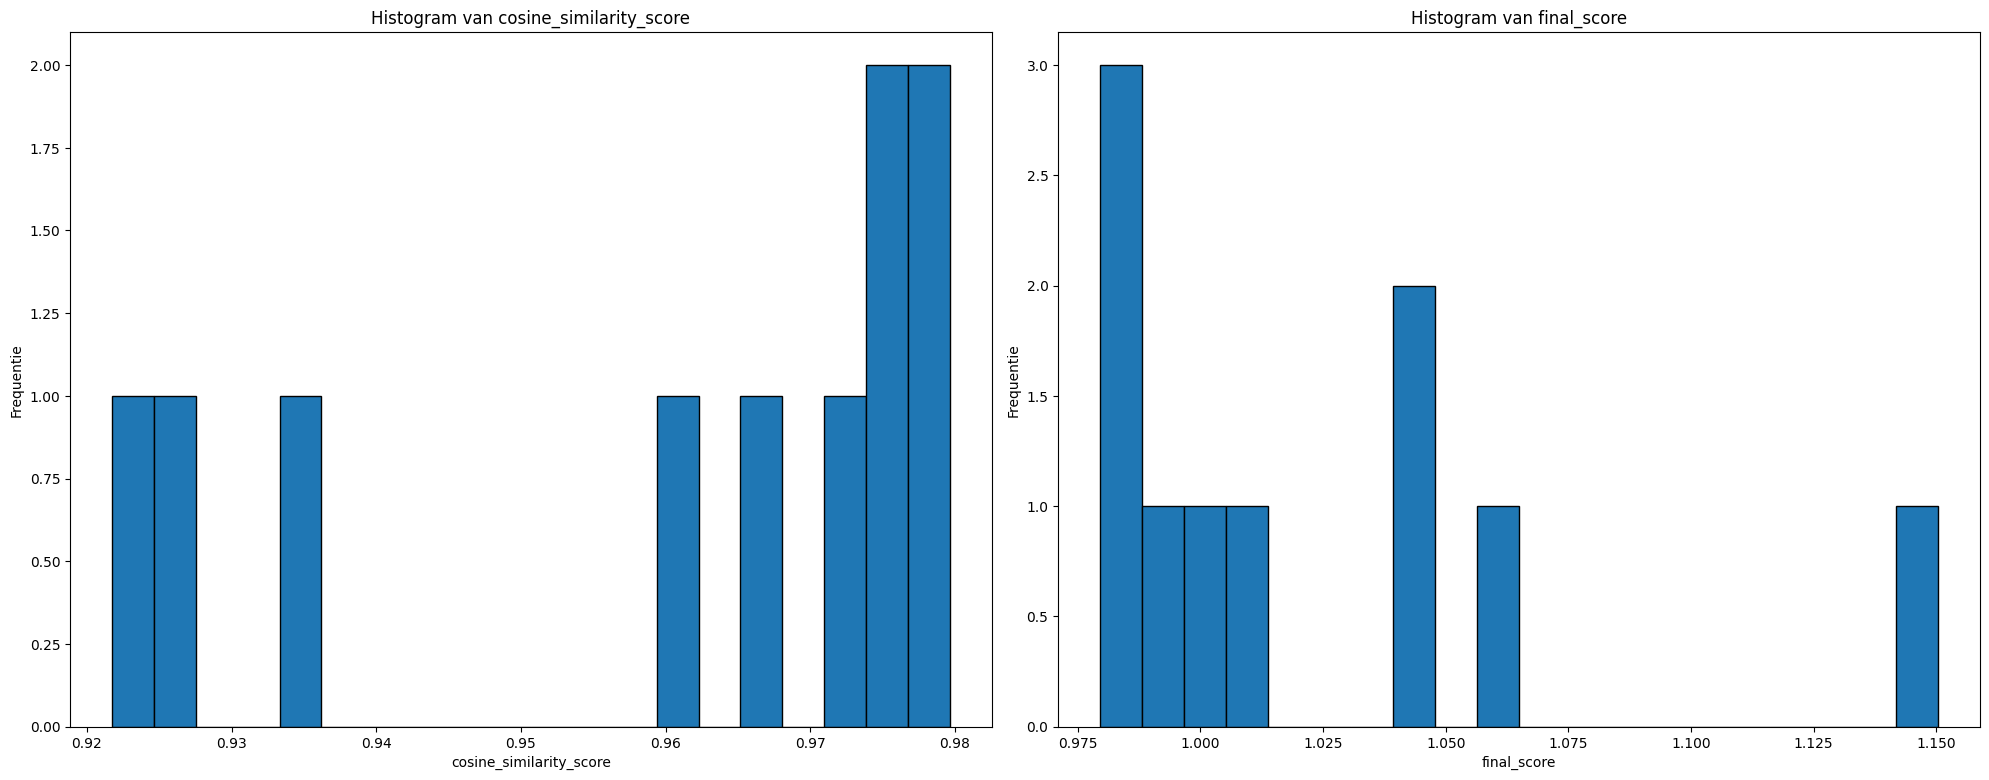

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    """
    Bereken de voorkeursscore voor een route op basis van gebruikersvoorkeuren en routekenmerken.

    Parameters:
        user_preferences (dict): Voorkeuren van de gebruiker.
        route_features (dict): Kenmerken van de route.

    Returns:
        float: Voorkeursscore voor de route.
    """
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Functie om histogrammen te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    """
    Plot histogrammen voor de gegeven features van de routes.

    Parameters:
        routes_df (DataFrame): DataFrame met routegegevens.
        features (list): Lijst van features om histogrammen van te plotten.
        bins (int, optional): Aantal bins voor de histogrammen. Standaard is 20.
        figsize (tuple, optional): Grootte van de figuur. Standaard is (20, 15).
    """
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, positie i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram van {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequentie')
    plt.tight_layout()
    plt.show()

# Functie om routes aan te bevelen voor een gebruiker
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    """
    Beveel routes aan voor een specifieke gebruiker en visualiseer de resultaten.

    Parameters:
        user_id (int): ID van de gebruiker.
        user_profiles_df (DataFrame): DataFrame met gebruikersprofielen.
        routes_df (DataFrame): DataFrame met routegegevens.
        user_route_color (str, optional): Kleur van de route van de gebruiker op de kaart. Standaard is 'red'.
        top_n (int, optional): Aantal topaanbevolen routes om weer te geven. Standaard is 10.

    Returns:
        folium.Map: Kaartobject met aanbevolen routes en gebruikerslocatie.
    """
    # Routes filteren die door de gebruiker zelf zijn geregistreerd
    routes_df = routes_df[routes_df['userId'] != user_id]

    # Genereren van een lijst met kleuren voor de visualisatie van routes
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
              'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
              'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
              'gray', 'black', 'lightgray']
    # Controleren of de gebruiker in de gewichten staat
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    # Gebruikersgegevens en locatie ophalen
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Afstand tussen gebruiker en elke route berekenen
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Normaliseer de preference_score met Min-Max normalisatie
    min_max_scaler = MinMaxScaler()
    routes_df['normalized_preference_score'] = min_max_scaler.fit_transform(routes_df[['preference_score']])

    # Cosine similarity berekenen
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances'], user_data['average_condition_value']]])
    route_features = routes_df[['altitude_change', 'distance', 'average_condition_value']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Finale score berekenen door cosine_similarity_score en normalized_preference_score te integreren
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['normalized_preference_score']

    # Top N aanbevolen routes selecteren
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)

    # Histogrammen voor de aanbevolen routes plotten
    features_to_plot = ['cosine_similarity_score', 'final_score']
    plot_histograms(recommended_routes, features_to_plot)

    # Visualisatie op een kaart
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles='cartodbpositron')
    
    # Marker voor de gebruiker met uitgebreide informatie
    user_info = f"Gebruiker ID: {user_id}<br>" \
                f"Meest voorkomende locatie: Lat {user_data['most_common_lat']}, Lon {user_data['most_common_lon']}" \
                f"Gemiddelde afstand: {user_data['orig_average_distances']} km<br>" 

    folium.Marker(
        location=user_location,
        popup=user_info,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)
    
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    for index, route in enumerate(recommended_routes.iterrows()):
        _, route = route  # Uitpakken van de tuple gegenereerd door iterrows()
        route_coords = list(zip(route['latitude'], route['longitude']))
        
        # Zorg voor een unieke kleur voor elke route
        color_index = index % len(colors)  # Gebruik modulo om ervoor te zorgen dat we binnen de kleurenbereik blijven
        route_color = colors[color_index]  # Selecteer kleur
        
        # Route-informatie verzamelen, inclusief weg- en ondergrondtypes
        route_info = f"Route ID: {route['id']}<br>" \
                    f"User ID: {route['userId']}<br>" \
                    f"Afstand: {route['orig_distance']} km<br>" \
                    f"Verandering in hoogte: {route['orig_altitude_change']} m<br>" \
                    f"Ondergrond: {', '.join(route.get('surfaces', ['Niet gespecificeerd']))}<br>" \
                    f"Weg: {', '.join(route.get('highways', ['Niet gespecificeerd']))}"
        folium.PolyLine(
            route_coords,
            color=route_color,  # Gebruik de unieke kleur
            weight=5,
            opacity=0.7,
            popup=route_info).add_to(map_obj)

    return map_obj
# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
min_max_scaler = MinMaxScaler()
user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'average_condition_value': condition_weight,
        'distance_to_user': 2.0,
        'preference_score': 1.0  # Nieuw gewicht voor voorkeursscore
    }

# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
sample_user_id = 8899244
# sample_user_id = 6361870
map_obj = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
map_obj


Gewichten voor gebruiker 8899244: {'average_altitude_change': 0.046380355686481, 'average_distance': 0.9536196443135181, 'distance_to_user': 2.0, 'preference_score': 0.1}


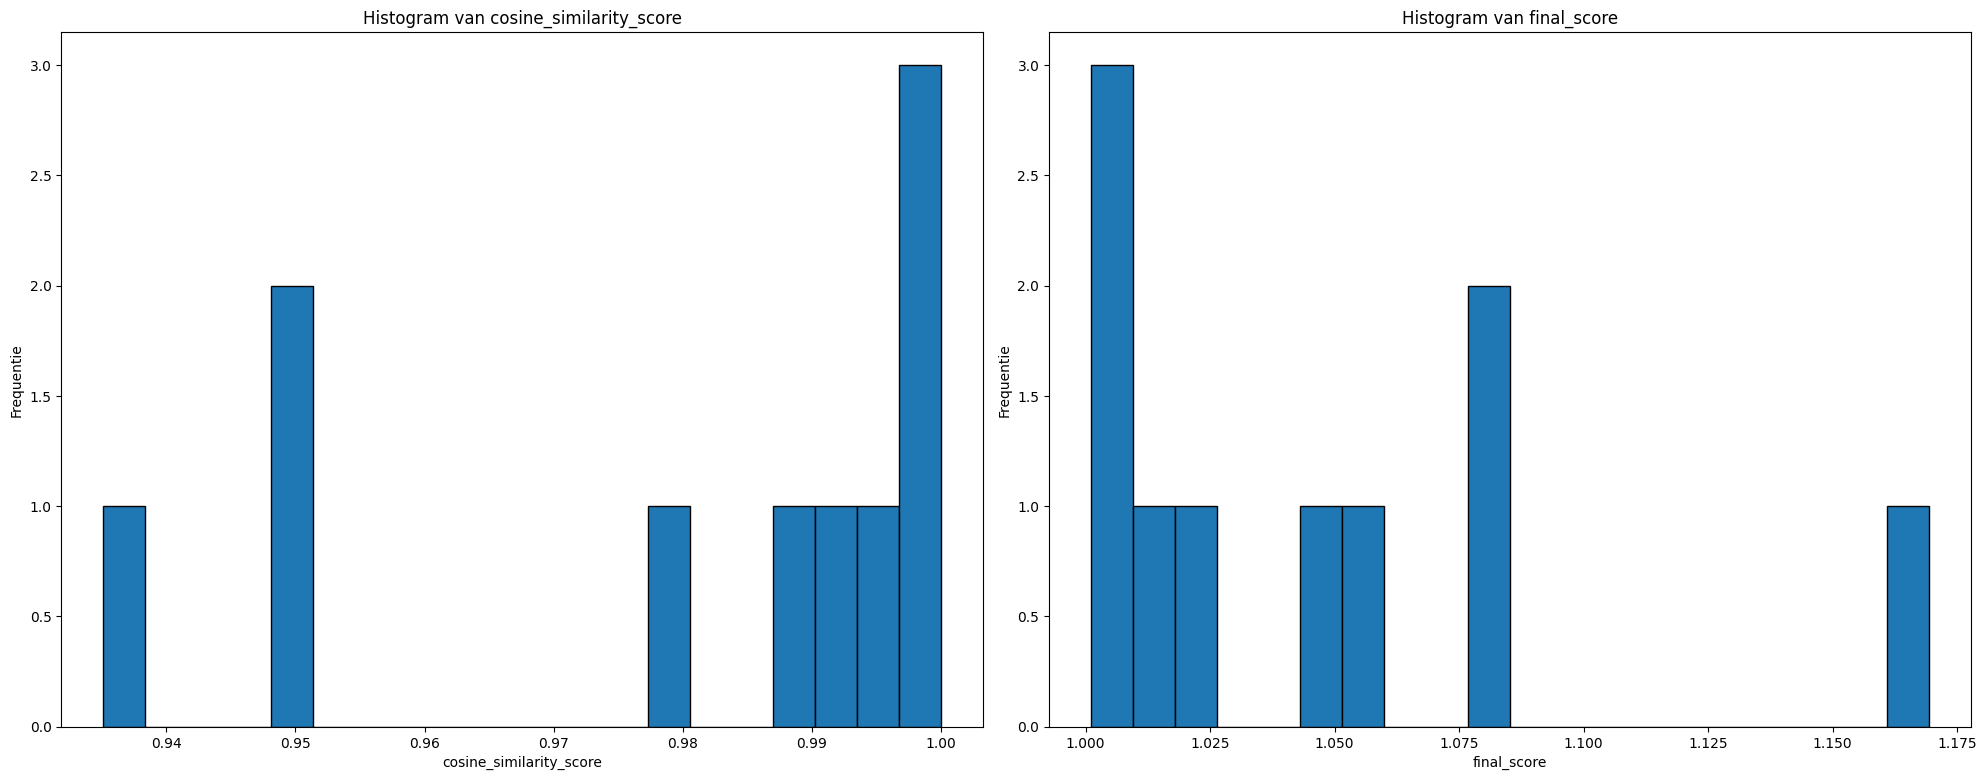

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from geopy.distance import geodesic
import folium
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Functie om voorkeursscores te berekenen
def calculate_preference_score(user_preferences, route_features):
    """
    Bereken de voorkeursscore voor een route op basis van gebruikersvoorkeuren en routekenmerken.

    Parameters:
        user_preferences (dict): Voorkeuren van de gebruiker.
        route_features (dict): Kenmerken van de route.

    Returns:
        float: Voorkeursscore voor de route.
    """
    score = 0
    total_preferences = sum(user_preferences.values())
    for feature_type, frequency in route_features.items():
        if feature_type in user_preferences:
            score += (user_preferences[feature_type] / total_preferences) * frequency
    return score

# Functie om histogrammen te plotten voor de gegeven features
def plot_histograms(routes_df, features, bins=20, figsize=(20, 15)):
    """
    Plot histogrammen voor de gegeven features van de routes.

    Parameters:
        routes_df (DataFrame): DataFrame met routegegevens.
        features (list): Lijst van features om histogrammen van te plotten.
        bins (int, optional): Aantal bins voor de histogrammen. Standaard is 20.
        figsize (tuple, optional): Grootte van de figuur. Standaard is (20, 15).
    """
    plt.figure(figsize=figsize)
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)  # 2x2 grid, positie i
        plt.hist(routes_df[feature], bins=bins, edgecolor='black')
        plt.title(f'Histogram van {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Frequentie')
    plt.tight_layout()
    plt.show()

# Functie om routes aan te bevelen voor een gebruiker
def recommend_routes_for_user_corrected(user_id, user_profiles_df, routes_df, user_route_color='red', top_n=10):
    """
    Beveel routes aan voor een specifieke gebruiker en visualiseer de resultaten.

    Parameters:
        user_id (int): ID van de gebruiker.
        user_profiles_df (DataFrame): DataFrame met gebruikersprofielen.
        routes_df (DataFrame): DataFrame met routegegevens.
        user_route_color (str, optional): Kleur van de route van de gebruiker op de kaart. Standaard is 'red'.
        top_n (int, optional): Aantal topaanbevolen routes om weer te geven. Standaard is 10.

    Returns:
        folium.Map: Kaartobject met aanbevolen routes en gebruikerslocatie.
    """
    # Routes filteren die door de gebruiker zelf zijn geregistreerd
    routes_df = routes_df[routes_df['userId'] != user_id]

    # Genereren van een lijst met kleuren voor de visualisatie van routes
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
              'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
              'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
              'gray', 'black', 'lightgray']
    # Controleren of de gebruiker in de gewichten staat
    if user_id in gewichten:
        print(f"Gewichten voor gebruiker {user_id}: {gewichten[user_id]}")
    else:
        print(f"Geen gewichten gevonden voor gebruiker {user_id}")
        return pd.DataFrame()

    # Gebruikersgegevens en locatie ophalen
    user_data = user_profiles_df[user_profiles_df['userId'] == user_id].iloc[0]
    user_location = (user_data['most_common_lat'], user_data['most_common_lon'])

    # Afstand tussen gebruiker en elke route berekenen
    routes_df['distance_to_user'] = routes_df.apply(lambda row: geodesic(user_location, (row['mean_latitude'], row['mean_longitude'])).kilometers, axis=1)

    # Voorkeursscores voor wegen en ondergronden berekenen
    routes_df['road_preference_score'] = routes_df['highways'].apply(lambda x: calculate_preference_score(user_data['voorkeur_wegen'], x))
    routes_df['surface_preference_score'] = routes_df['surfaces'].apply(lambda x: calculate_preference_score(user_data['voorkeur_ondergronden'], x))
    routes_df['preference_score'] = (routes_df['road_preference_score'] + routes_df['surface_preference_score']) / 2

    # Normaliseer de preference_score met Min-Max normalisatie
    min_max_scaler = MinMaxScaler()
    routes_df['normalized_preference_score'] = min_max_scaler.fit_transform(routes_df[['preference_score']])

    # Aangepast om average_condition_value te verwijderen uit de cosine similarity berekening
    user_features = np.array([[user_data['average_altitude_changes'], user_data['average_distances']]])
    route_features = routes_df[['altitude_change', 'distance']].to_numpy()
    routes_df['cosine_similarity_score'] = cosine_similarity(user_features, route_features).flatten()

    # Finale score berekenen door cosine_similarity_score en normalized_preference_score te integreren
    routes_df['final_score'] = routes_df['cosine_similarity_score'] + routes_df['normalized_preference_score']

    # Top N aanbevolen routes selecteren
    recommended_routes = routes_df.sort_values(by='final_score', ascending=False).head(top_n)

    # Histogrammen voor de aanbevolen routes plotten
    features_to_plot = ['cosine_similarity_score', 'final_score']
    plot_histograms(recommended_routes, features_to_plot)

    # Visualisatie op een kaart
    map_obj = folium.Map(location=user_location, zoom_start=12, tiles='cartodbpositron')
    
    # Marker voor de gebruiker met uitgebreide informatie
    user_info = f"Gebruiker ID: {user_id}<br>" \
                f"Meest voorkomende locatie: Lat {user_data['most_common_lat']}, Lon {user_data['most_common_lon']}" \
                f"Gemiddelde afstand: {user_data['orig_average_distances']} km<br>" 

    folium.Marker(
        location=user_location,
        popup=user_info,
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(map_obj)
    
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    # Lijnen voor de aanbevolen routes met uitgebreide route-informatie
    for index, route in enumerate(recommended_routes.iterrows()):
        _, route = route  # Uitpakken van de tuple gegenereerd door iterrows()
        route_coords = list(zip(route['latitude'], route['longitude']))
        
        # Zorg voor een unieke kleur voor elke route
        color_index = index % len(colors)  # Gebruik modulo om ervoor te zorgen dat we binnen de kleurenbereik blijven
        route_color = colors[color_index]  # Selecteer kleur
        
        # Route-informatie verzamelen, inclusief weg- en ondergrondtypes
        route_info = f"Route ID: {route['id']}<br>" \
                    f"User ID: {route['userId']}<br>" \
                    f"Afstand: {route['orig_distance']} km<br>" \
                    f"Verandering in hoogte: {route['orig_altitude_change']} m<br>" \
                    f"Ondergrond: {', '.join(route.get('surfaces', ['Niet gespecificeerd']))}<br>" \
                    f"Weg: {', '.join(route.get('highways', ['Niet gespecificeerd']))}"
        folium.PolyLine(
            route_coords,
            color=route_color,  # Gebruik de unieke kleur
            weight=5,
            opacity=0.7,
            popup=route_info).add_to(map_obj)

    return map_obj
# Laad de gebruikersprofielen en routes
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen_v2.json', lines=True)
routes_df = pd.read_json('nieuw_bestand.json', lines=True)

# Preprocessing van de routegegevens
routes_df['mean_altitude'] = routes_df['altitude'].apply(np.mean)
routes_df['mean_latitude'] = routes_df['latitude'].apply(np.mean)
routes_df['mean_longitude'] = routes_df['longitude'].apply(np.mean)

# Bewaar de originele waarden in aparte kolommen voor visualisatie
user_profiles_df['orig_average_speeds'] = user_profiles_df['average_speeds']
user_profiles_df['orig_average_altitude_changes'] = user_profiles_df['average_altitude_changes']
user_profiles_df['orig_average_distances'] = user_profiles_df['average_distances']
user_profiles_df['orig_average_condition_value'] = user_profiles_df['average_condition_value']

routes_df['orig_altitude_change'] = routes_df['altitude_change']
routes_df['orig_distance'] = routes_df['distance']
routes_df['orig_mean_altitude'] = routes_df['mean_altitude']
routes_df['orig_average_condition_value'] = routes_df['average_condition_value']

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Normaliseer de kenmerken behalve coördinaten met Min-Max schaling
min_max_scaler = MinMaxScaler()
user_profiles_df['average_condition_value'] = min_max_scaler.fit_transform(user_profiles_df[['average_condition_value']])

# RobustScaler voor de overige kenmerken
robust_scaler_user_profiles = RobustScaler()
features_to_scale_user_profiles = ['average_speeds', 'average_altitude_changes', 'average_distances']
user_profiles_df[features_to_scale_user_profiles] = robust_scaler_user_profiles.fit_transform(user_profiles_df[features_to_scale_user_profiles])

robust_scaler_routes = RobustScaler()
features_to_scale_routes = ['altitude_change', 'distance', 'mean_altitude']
routes_df[features_to_scale_routes] = robust_scaler_routes.fit_transform(routes_df[features_to_scale_routes])

# Bepaal gewichten voor gebruikerskenmerken
gewichten = {}
for index, row in user_profiles_df.iterrows():
    user_id = row['userId']
    altitude_weight = row['weight_std_altitude_change']
    distance_weight = row['weight_std_distance']
    # condition_weight = row['weight_std_condition_value']
    gewichten[user_id] = {
        'average_altitude_change': altitude_weight, 
        'average_distance': distance_weight, 
        'distance_to_user': 2.0,
        'preference_score': 0.1  # Nieuw gewicht voor voorkeursscore
    }

# Test de functie voor een specifieke gebruiker en visualiseer de resultaten
sample_user_id = 8899244
# sample_user_id = 6361870
# sample_user_id = 5325166
map_obj = recommend_routes_for_user_corrected(sample_user_id, user_profiles_df, routes_df)

# In een Jupyter-notebook, toon de kaart direct
map_obj


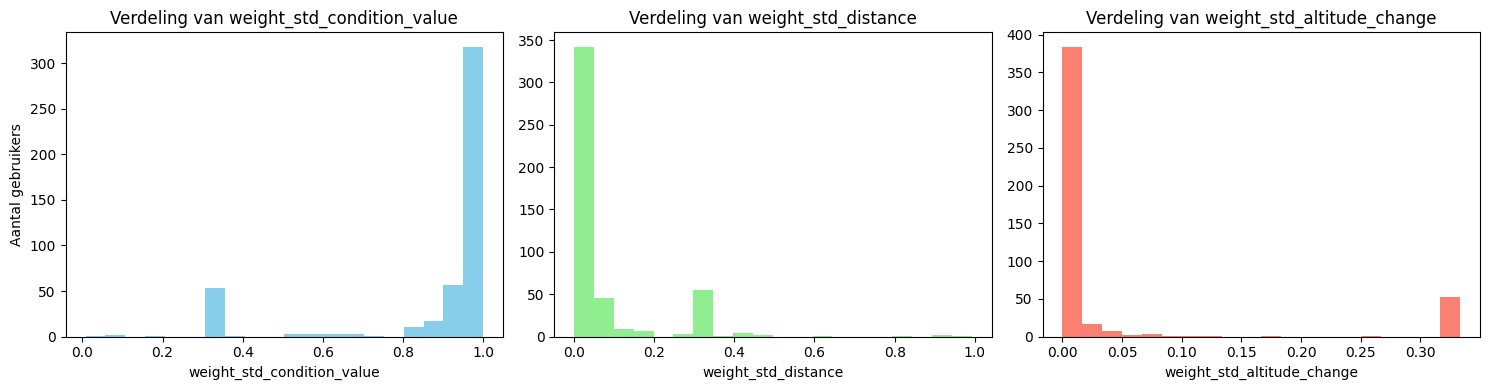

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Gegevens laden
user_profiles_df = pd.read_json('bijgewerkte_gebruikersprofielen.json', lines=True)

# Histogram van weight_std_condition_value
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(user_profiles_df['weight_std_condition_value'], bins=20, color='skyblue')
plt.title('Verdeling van weight_std_condition_value')
plt.xlabel('weight_std_condition_value')
plt.ylabel('Aantal gebruikers')

# Histogram van weight_std_distance
plt.subplot(1, 3, 2)
plt.hist(user_profiles_df['weight_std_distance'], bins=20, color='lightgreen')
plt.title('Verdeling van weight_std_distance')
plt.xlabel('weight_std_distance')

# Histogram van weight_std_altitude_change
plt.subplot(1, 3, 3)
plt.hist(user_profiles_df['weight_std_altitude_change'], bins=20, color='salmon')
plt.title('Verdeling van weight_std_altitude_change')
plt.xlabel('weight_std_altitude_change')

plt.tight_layout()
plt.show()


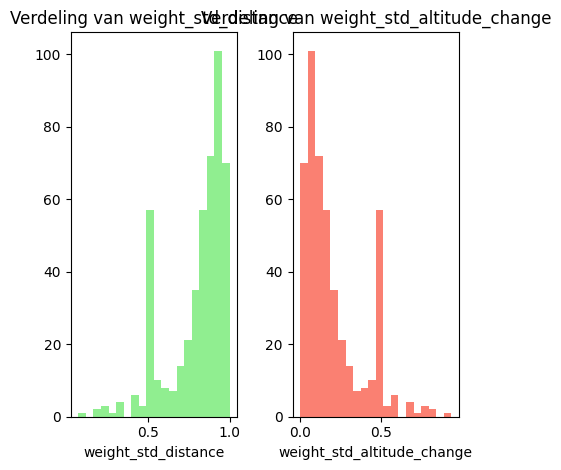

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Gegevens laden
user_profiles_df = pd.read_json('../Data/Loopdata/kleinebestanden/run_gebruikersprofielen_v2.json', lines=True)

# Histogram van weight_std_condition_value
# plt.figure(figsize=(15, 4))
# plt.subplot(1, 3, 1)
# plt.hist(user_profiles_df['weight_std_condition_value'], bins=20, color='skyblue')
# plt.title('Verdeling van weight_std_condition_value')
# plt.xlabel('weight_std_condition_value')
# plt.ylabel('Aantal gebruikers')

# Histogram van weight_std_distance
plt.subplot(1, 3, 2)
plt.hist(user_profiles_df['weight_std_distance'], bins=20, color='lightgreen')
plt.title('Verdeling van weight_std_distance')
plt.xlabel('weight_std_distance')

# Histogram van weight_std_altitude_change
plt.subplot(1, 3, 3)
plt.hist(user_profiles_df['weight_std_altitude_change'], bins=20, color='salmon')
plt.title('Verdeling van weight_std_altitude_change')
plt.xlabel('weight_std_altitude_change')

plt.tight_layout()
plt.show()


In [9]:
import json

# Functie om alle userId's te extraheren
def extract_userids(file_path):
    userids = []
    with open(file_path, 'r') as file:
        data = file.read()
        # Split de data op posities waar een nieuw JSON-object begint
        objects = data.split('\n}\n{\n')
        # Voeg de noodzakelijke karakters toe die verwijderd werden tijdens het splitsen
        objects = [objects[0] + '\n}'] + ['{\n' + obj + '\n}' for obj in objects[1:-1]] + ['{\n' + objects[-1]]
        
        for obj in objects:
            try:
                json_obj = json.loads(obj)
                userids.append(json_obj['userId'])
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON: {e}")
            except KeyError as e:
                print(f"Missing key in JSON object: {e}")
    
    return userids

# Pad naar het JSON-bestand
file_path = 'bijgewerkte_gebruikersprofielen.json'

# Roep de functie aan en druk de userId's af
userids = extract_userids(file_path)
print(userids)


Error parsing JSON: Extra data: line 2 column 1 (char 1345)
Error parsing JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)
[]


In [10]:
import json

def copy_first_100_lines(input_file_path, output_file_path):
    # Open het oorspronkelijke bestand om te lezen
    with open(input_file_path, 'r') as input_file:
        # Open het nieuwe bestand om naar te schrijven
        with open(output_file_path, 'w') as output_file:
            # Lees de eerste 100 lijnen
            for _ in range(100):
                line = input_file.readline()
                # Stop als er geen regels meer zijn
                if not line:
                    break
                # Probeer de JSON te parsen om te verzekeren dat het een geldig object is
                try:
                    json_object = json.loads(line)
                    # Schrijf het JSON-object als een string naar het nieuwe bestand
                    json.dump(json_object, output_file)
                    output_file.write('\n')  # Voeg een nieuwe regel toe na elk object
                except json.JSONDecodeError as e:
                    print(f"Error parsing JSON: {e}")
                    continue  # Ga verder met de volgende regel als deze niet geparsed kan worden

# Definieer de paden voor de input- en output-bestanden
input_file_path = 'bijgewerkte_gebruikersprofielen.json'
output_file_path = 'demo.json'

# Roep de functie aan om de eerste 100 lijnen te kopiëren
copy_first_100_lines(input_file_path, output_file_path)

print(f"De eerste 100 lijnen zijn gekopieerd naar {output_file_path}.")


De eerste 100 lijnen zijn gekopieerd naar demo.json.


In [12]:
import json

# Pad naar het JSON-bestand
# file_path = 'demo.json'
file_path = 'bijgewerkte_gebruikersprofielen.json'

user_ids = []

# Laden en verwerken van de JSON-data, regel voor regel
with open(file_path, 'r') as file:
    for line in file:
        # Elke regel is een JSON object
        json_object = json.loads(line)
        # Extractie van de userId en toevoegen aan de lijst
        user_ids.append(json_object['userId'])

print(user_ids)


[3905196, 854368, 4419649, 8467445, 732008, 6361870, 885462, 13693003, 5325166, 10057948, 3060590, 14066832, 6539051, 2104631, 982359, 1543833, 1655221, 196571, 6194859, 4752000, 12726303, 7470676, 56291, 407769, 3559941, 11258873, 90592, 5255745, 13165320, 2232554, 1066105, 6828710, 229190, 14244423, 4433918, 6873187, 260784, 3288898, 2487889, 5964610, 2868369, 5386323, 9985340, 1069797, 9275291, 7231044, 804068, 13469928, 1377236, 3545637, 1812737, 854633, 4203888, 331586, 9356728, 3824420, 993718, 324779, 12615249, 775277, 2699896, 3700284, 5407179, 2675116, 3691161, 68009, 1034368, 11258520, 11330346, 3445572, 10099726, 1023513, 3655927, 11825035, 221371, 8276277, 9655659, 1820027, 6946869, 2849785, 5269471, 1052460, 3556695, 10815918, 8785331, 3091798, 1616449, 3324472, 6342136, 7822006, 3297710, 6113340, 4836713, 13564468, 2282039, 2941284, 8621055, 12635957, 7404960, 12753836, 2497422, 751448, 3272464, 434265, 4321971, 13088747, 1290773, 9937628, 1367925, 14544270, 3736342, 8299